In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
#import optuna

df=pd.read_csv('laptop_price.csv', encoding='latin-1')
#df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv',encoding='latin-1')

In [2]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [3]:
df.drop(columns='laptop_ID', inplace=True)
df.duplicated().sum()

28

In [4]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(1275, 12)

## EXPLORATORY DATA  ANALYSIS

In [5]:
df.describe()

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


<Axes: xlabel='Company', ylabel='Price_euros'>

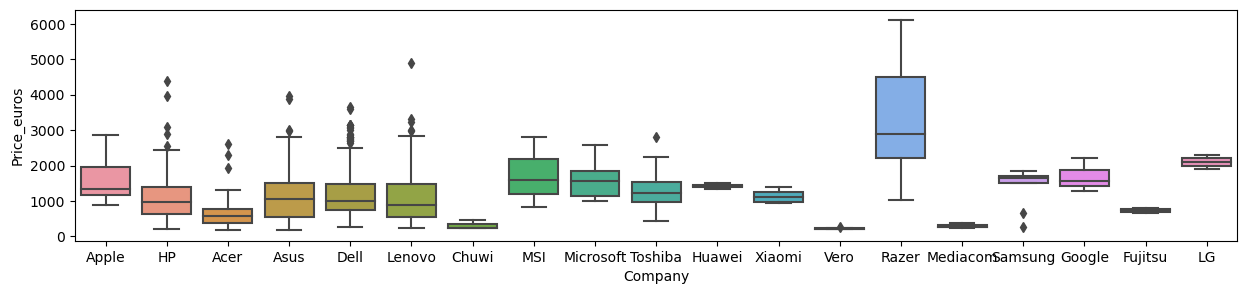

In [6]:
plt.figure(figsize = (15,3),)
sns.boxplot(x = df.Company, y= "Price_euros",data=df)
#  Razer company has 7  values but a quite expansive  gaming brand that impacts the model like  an outlier brand
#  there are  outliers  at price point 3000 euros  and  above

## **there are  outliers  at price point 3000 euros  and  above  so we can  apply  empirical  rule  !!**
## 68--95--99.7 RULE  ( M+ 3 * STD  FOR 99.7)

In [7]:
df.describe()

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


In [8]:
# 68--95--99.7 RULE  ( M+ 3 * STD  FOR 99.7)

limit_price=1134.969 + (3 * 700.752)
limit_price

3237.225

In [9]:

df.loc[df.Price_euros>limit_price,'Price_euros']=limit_price
df.describe()


,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1126.231882
std,1.429470,662.651566
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,3237.225000


In [10]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [11]:
df2=(df.assign(isIps=df.ScreenResolution.apply(lambda x:1 if 'IPS' in str(x) else 0).astype('int8'),
           #product=df.Product.apply(lambda x:x.split(' ')[0] if len(str(x))>0 else x),
           company=df.Company.astype('category'),    
           compt_type=df.TypeName.astype('category'),
           productt=df.Product.apply(lambda x:x.split(' ')[0] if (df.Product.value_counts()[x]>=1) else 'other_prod').astype('category'),
           isTouchScreen=df.ScreenResolution.apply(lambda x:1 if 'touchscreen' in str(x).lower() else 0).astype('int8'),
           int_ScreenResolution=df.ScreenResolution.apply(lambda x:x.split(' ').pop() if 'x' in str(x).lower() else x).astype('category'),
           cpu_name=df.Cpu.apply(lambda x:(x.split(' ')[0]+ ' ' +x.split(' ')[1]+ ' '+x.split(' ')[2]) if len(x.split(' '))>=1 else x).astype('category'),
           cpu_speed=df.Cpu.apply(lambda x:x.split(' ').pop().strip("GHz") if 'hz' in str(x).lower() else x).astype('float'),
           ram=df.Ram.apply(lambda x: x.strip('GB') if 'gb' in str(x).lower() else x).astype('int16'),
           memory_size=df.Memory.apply(lambda x: x.split()[0].strip('GB') if 'b' in str(x).lower() else x)\
           .apply(lambda x: '1024'  if x in ['1T','1.0T'] else x)\
           .apply(lambda x: '2048'  if x=='2T' else x).astype('int16'),
           memory_type=df.Memory.apply(lambda x:x.split(' ')[1] if x.split(' ')[1] in ['SSD','HDD']  else 'flash_storage').astype('category'),
           extra_memory=df.Memory.apply(lambda x:x.split().pop(3) if '+' in str(x)  else 0).apply(lambda x:'1TB' if x in ['1.0TB','+']  else x).apply(lambda x: x.split()[0].strip('GB') if 'b' in str(x).lower() else x)\
           .apply(lambda x: '1024'  if x in ['1T','1.0T'] else x)\
           .apply(lambda x: '2048'  if x=='2T' else x).astype('int16'),
           #gpu=df.Gpu.apply(lambda x:(x.split(' ')[0]+ ' ' +x.split(' ')[1]+' '+x.split(' ')[2]) if df.Gpu.value_counts()[x]>=5 else 'other_gpu').astype('category'),
               
           gpu_brand=df.Gpu.apply(lambda x: (x.split().pop(0))).astype('category'),
           gpu_name=df.Gpu.apply(lambda x: (x.split().pop())).astype('category'),
           isRetina=df.ScreenResolution.apply(lambda x: 1 if 'retina' in str(x).lower() else 0).astype('int8'),
           isQuadscr=df.ScreenResolution.apply(lambda x: 1 if 'Quad HD+' in str(x) else 0).astype('int8'),
               
           operate_sys=df.OpSys.apply(lambda x:'Windows 10' if 'Windows 10 S' in x  else x).astype('category'),
           weight=df.Weight.apply(lambda x: x.strip('kg') if 'kg' in str(x).lower() else x).astype('float'),
           #price=df.Price_euros.astype('float'),
           price=df.Price_euros.copy().astype('float')
           
)
 
 #.Company
 #.Product
 #.TypeName
 #.Inches
 #.ScreenResolution
 #.Cpu
 #Ram
 #.Memory
 #.Gpu
 #.OpSys
 
 .drop(columns=['Company','TypeName','Product','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight','Price_euros'])
  
 #.productt
 #.isIps
 #.int_ScreenResolution
 #.isTouchScreen
 #.cpu_name
 #.cpu_speed
 #.ram
 #.memory_size
 #.memory_type
 #.gpu
 #.extra_memory
 #.weight
 #.operate_sys
 
 
 #.value_counts()#.tail(59)#.sum()
 #.columns
 #.info()
 #.isnull().any()
 #.duplicated().any()
 #.unique()
 #.sum()
 #.describe().T
 #.memory_usage(deep=True).sum()
 #.hist(bins=10,figsize=(18,10))
 #.head(11)
).copy()

In [12]:
df2.head(3)

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,13.3,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,2.3,8,128,SSD,0,Intel,640,1,0,macOS,1.37,1339.69
1,13.3,0,Apple,Ultrabook,Macbook,0,1440x900,Intel Core i5,1.8,8,128,flash_storage,0,Intel,6000,0,0,macOS,1.34,898.94
2,15.6,0,HP,Notebook,250,0,1920x1080,Intel Core i5,2.5,8,256,SSD,0,Intel,620,0,0,No OS,1.86,575.00


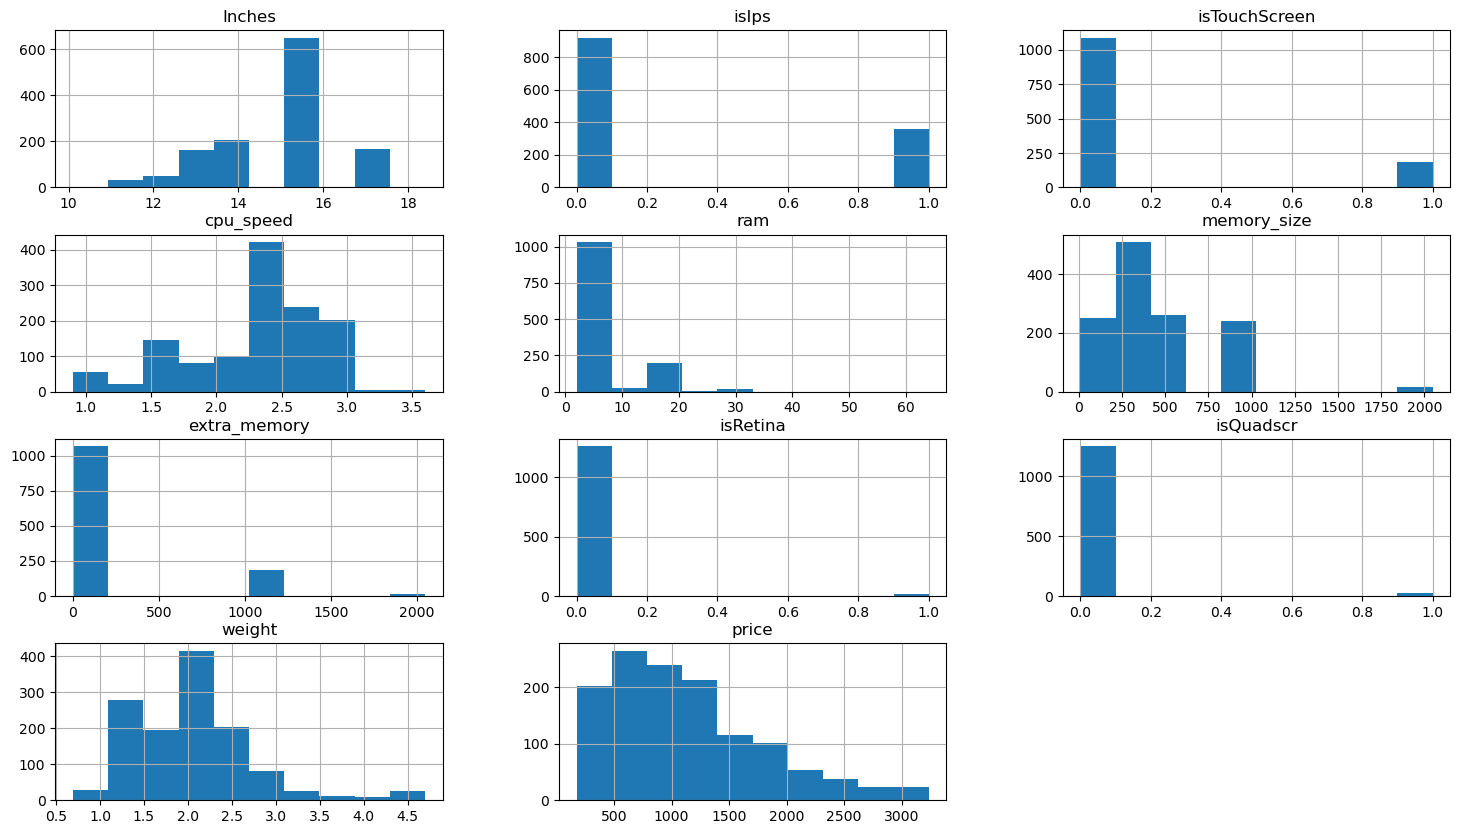

In [13]:
df2.hist(figsize=(18,10));

In [14]:
df2.corr()

C:\Users\bayramlar\AppData\Local\Temp\ipykernel_13816\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Inches,isIps,isTouchScreen,cpu_speed,ram,memory_size,extra_memory,isRetina,isQuadscr,weight,price
Inches,1.000000,-0.110116,-0.361957,0.305037,0.241078,0.264280,0.389067,-0.142079,-0.172811,0.826638,0.052562
isIps,-0.110116,1.000000,0.139723,0.064358,0.201781,-0.120513,0.089766,0.186411,0.013826,0.022129,0.261039
isTouchScreen,-0.361957,0.139723,1.000000,-0.091798,0.111622,-0.025798,-0.135244,-0.048345,0.239562,-0.293984,0.188122
cpu_speed,0.305037,0.064358,-0.091798,1.000000,0.366254,0.056320,0.224521,-0.063143,-0.042327,0.318649,0.438196
ram,0.241078,0.201781,0.111622,0.366254,1.000000,0.015365,0.390939,0.030202,0.071055,0.389370,0.725840
memory_size,0.264280,-0.120513,-0.025798,0.056320,0.015365,1.000000,-0.244182,-0.032428,-0.024349,0.175433,-0.143389
extra_memory,0.389067,0.089766,-0.135244,0.224521,0.390939,-0.244182,1.000000,-0.049225,-0.063452,0.481495,0.309368
isRetina,-0.142079,0.186411,-0.048345,-0.063143,0.030202,-0.032428,-0.049225,1.000000,-0.017419,-0.122862,0.093298
isQuadscr,-0.172811,0.013826,0.239562,-0.042327,0.071055,-0.024349,-0.063452,-0.017419,1.000000,-0.174764,0.111011
weight,0.826638,0.022129,-0.293984,0.318649,0.389370,0.175433,0.481495,-0.122862,-0.174764,1.000000,0.198085


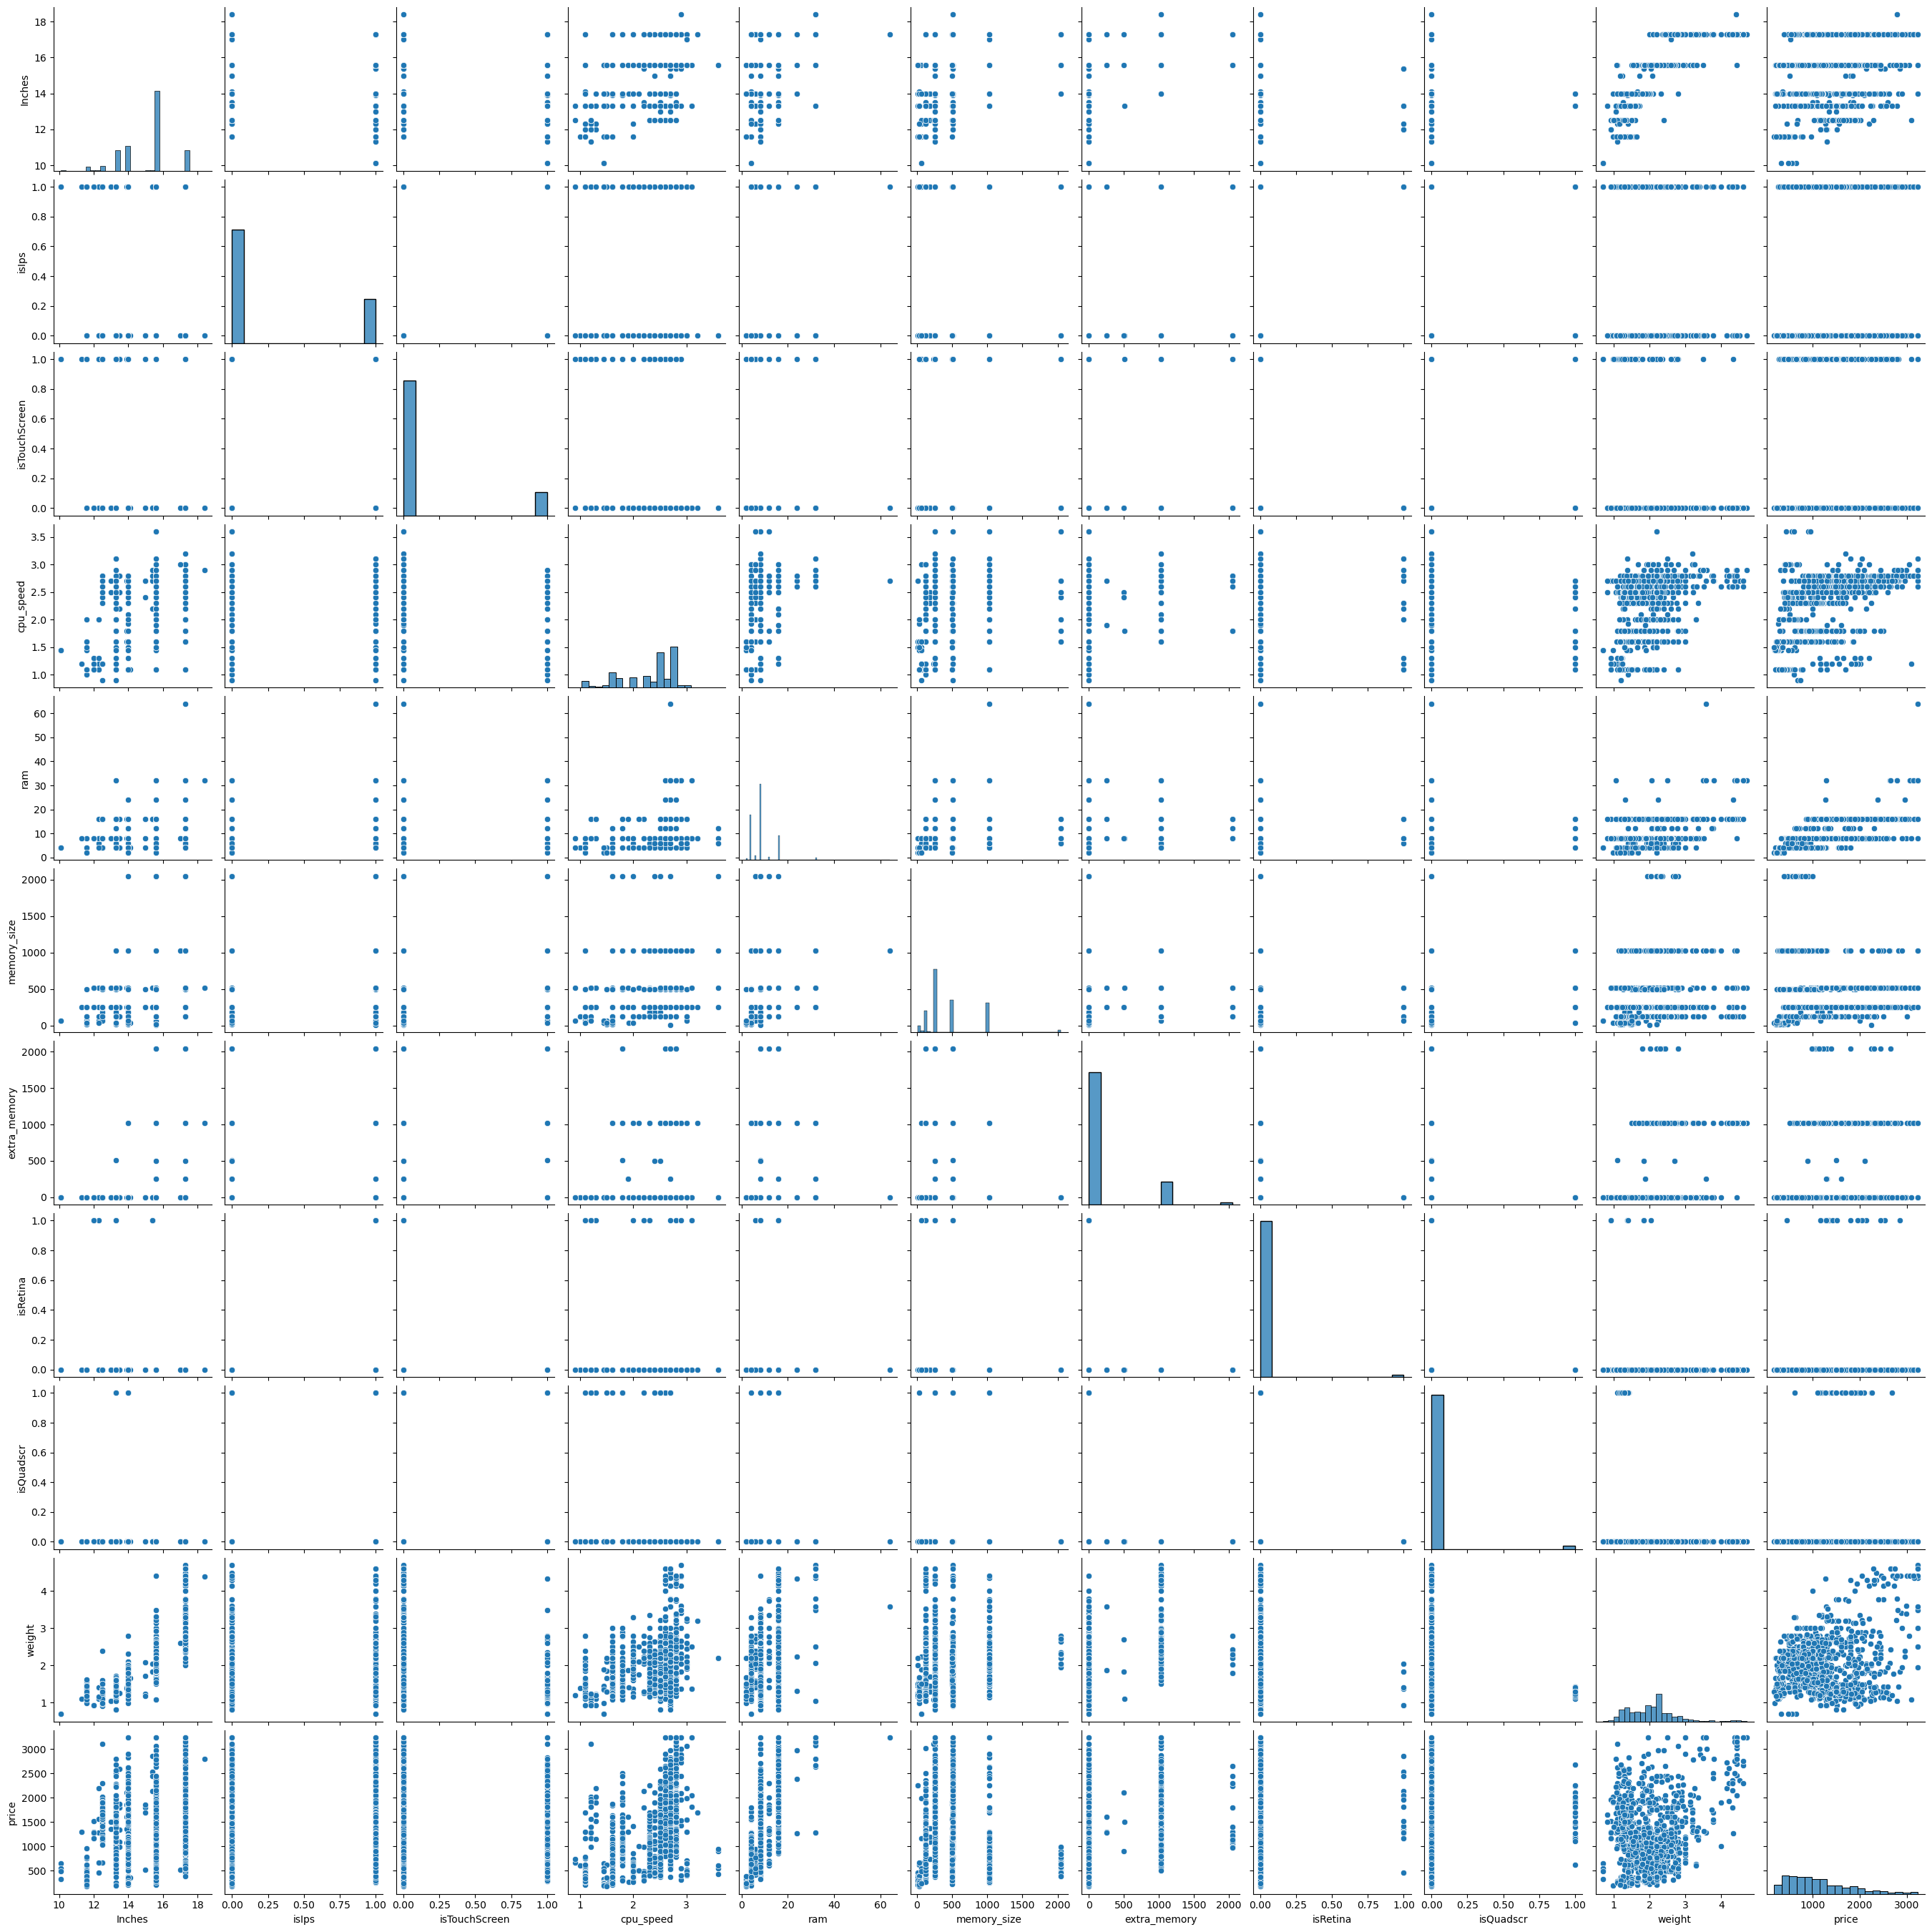

In [15]:
sns.pairplot(df2)

C:\Users\bayramlar\AppData\Local\Temp\ipykernel_7032\822936298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")


<Axes: >

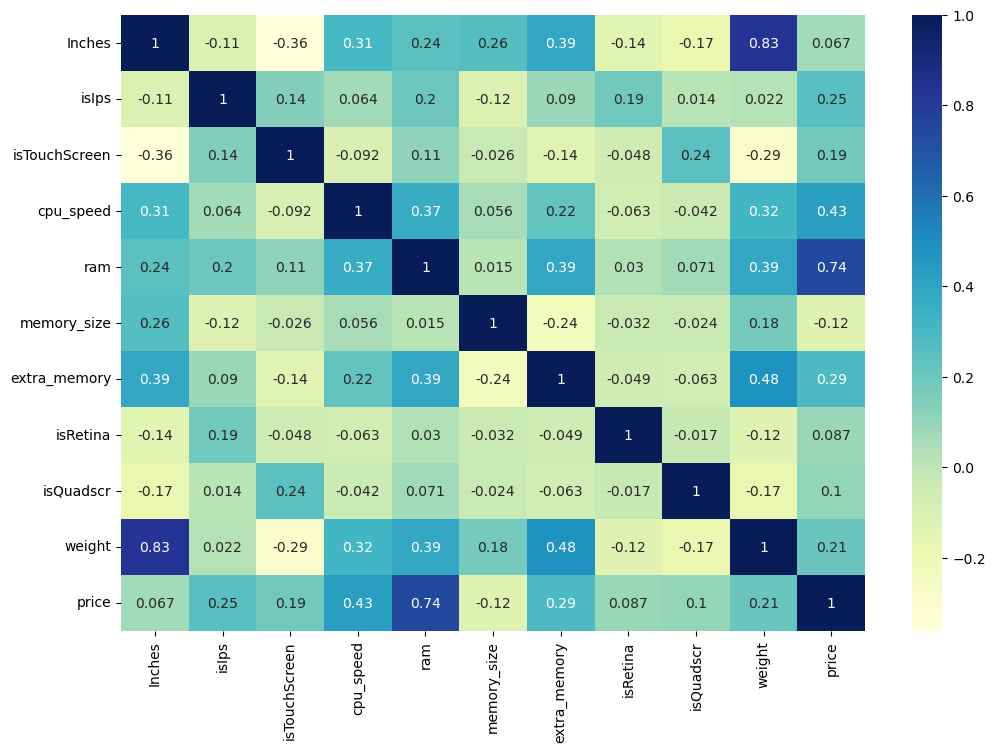

In [57]:
plt.figure(figsize = (12, 8))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")

 * The heatmap  shows  that :
 * very  high  correlation value (0.74)  between  price  and  ram  !!
 * there is    high  correlation value (0.43)  between  price  and  cpu_speed  !!
 * there are also  correlations  between  price vs  extra_memory(0.29),
    price vs ıps screen(0.25), price vs weight(0.21), and price  vs touch screen display(0.19)!!

In [12]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [13]:
df_ll=pd.DataFrame(df.Company.value_counts())
df_ll.index[:12]

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft'],
      dtype='object')

<Axes: xlabel='Ram', ylabel='Price_euros'>

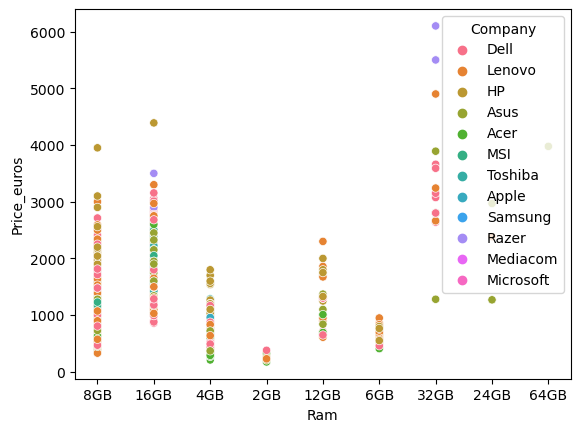

In [128]:
sns.scatterplot(data=df, x="Ram", y="Price_euros", hue=df.Company,hue_order=['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft'])

 * **The graph above shows that mostly laptops that has 4GB, 8GB, and 16GB ram are usually sold among all laptop brands** 

In [127]:
df.Company.value_counts()

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [131]:
df2.columns

Index(['Inches', 'isIps', 'company', 'compt_type', 'productt', 'isTouchScreen',
       'int_ScreenResolution', 'cpu_name', 'cpu_speed', 'ram', 'memory_size',
       'memory_type', 'extra_memory', 'gpu_brand', 'gpu_name', 'isRetina',
       'isQuadscr', 'operate_sys', 'weight', 'price'],
      dtype='object')

In [618]:
df_pie=pd.DataFrame(df2.company.value_counts(),columns=['company'])
df_pie.company

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
Name: company, dtype: int64

In [614]:
list(df_pie.company)
df_pie.index

CategoricalIndex(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba',
                  'Apple', 'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Vero',
                  'Xiaomi', 'Google', 'Fujitsu', 'Chuwi', 'LG', 'Huawei'],
                 categories=['Acer', 'Apple', 'Asus', 'Chuwi', ..., 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], ordered=False, dtype='category')

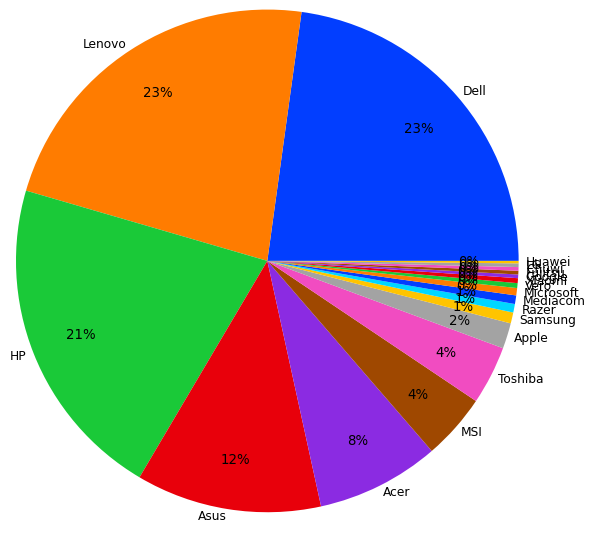

In [654]:
# PIE CHART GRAPH OF COMPANIES AND THEIR VALUE COUNTS
palette_color = seaborn.color_palette('bright')
plt.pie(df_pie.company, labels=df_pie.index, colors=palette_color, autopct='%.0f%%',labeldistance=1.03,pctdistance=0.8,radius=1.7)
plt.label='fdfafaff'
plt.show()

<Axes: xlabel='compt_type', ylabel='price'>

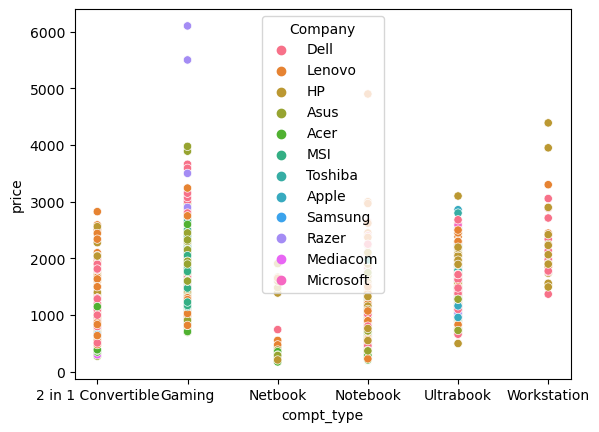

In [133]:
sns.scatterplot(data=df2, x="compt_type", y="price", hue=df.Company,hue_order=['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft'])

 * **The graph above shows that workstation and Gaming laptops prices are  usually more than 1000 dollars price point**

In [346]:
graph=pd.DataFrame(df2.groupby('company')['price'].agg(['mean','min','max']),columns=['mean','min','max'])
graph

,mean,min,max
company,,,
Acer,633.464455,174.00,2599.00
Apple,1564.198571,898.94,2858.00
Asus,1123.829737,191.90,3975.00
Chuwi,314.296667,244.99,449.00
Dell,1199.225120,274.90,3659.40
Fujitsu,729.000000,649.00,799.00
Google,1677.666667,1275.00,2199.00
HP,1080.314664,209.00,4389.00
Huawei,1424.000000,1349.00,1499.00


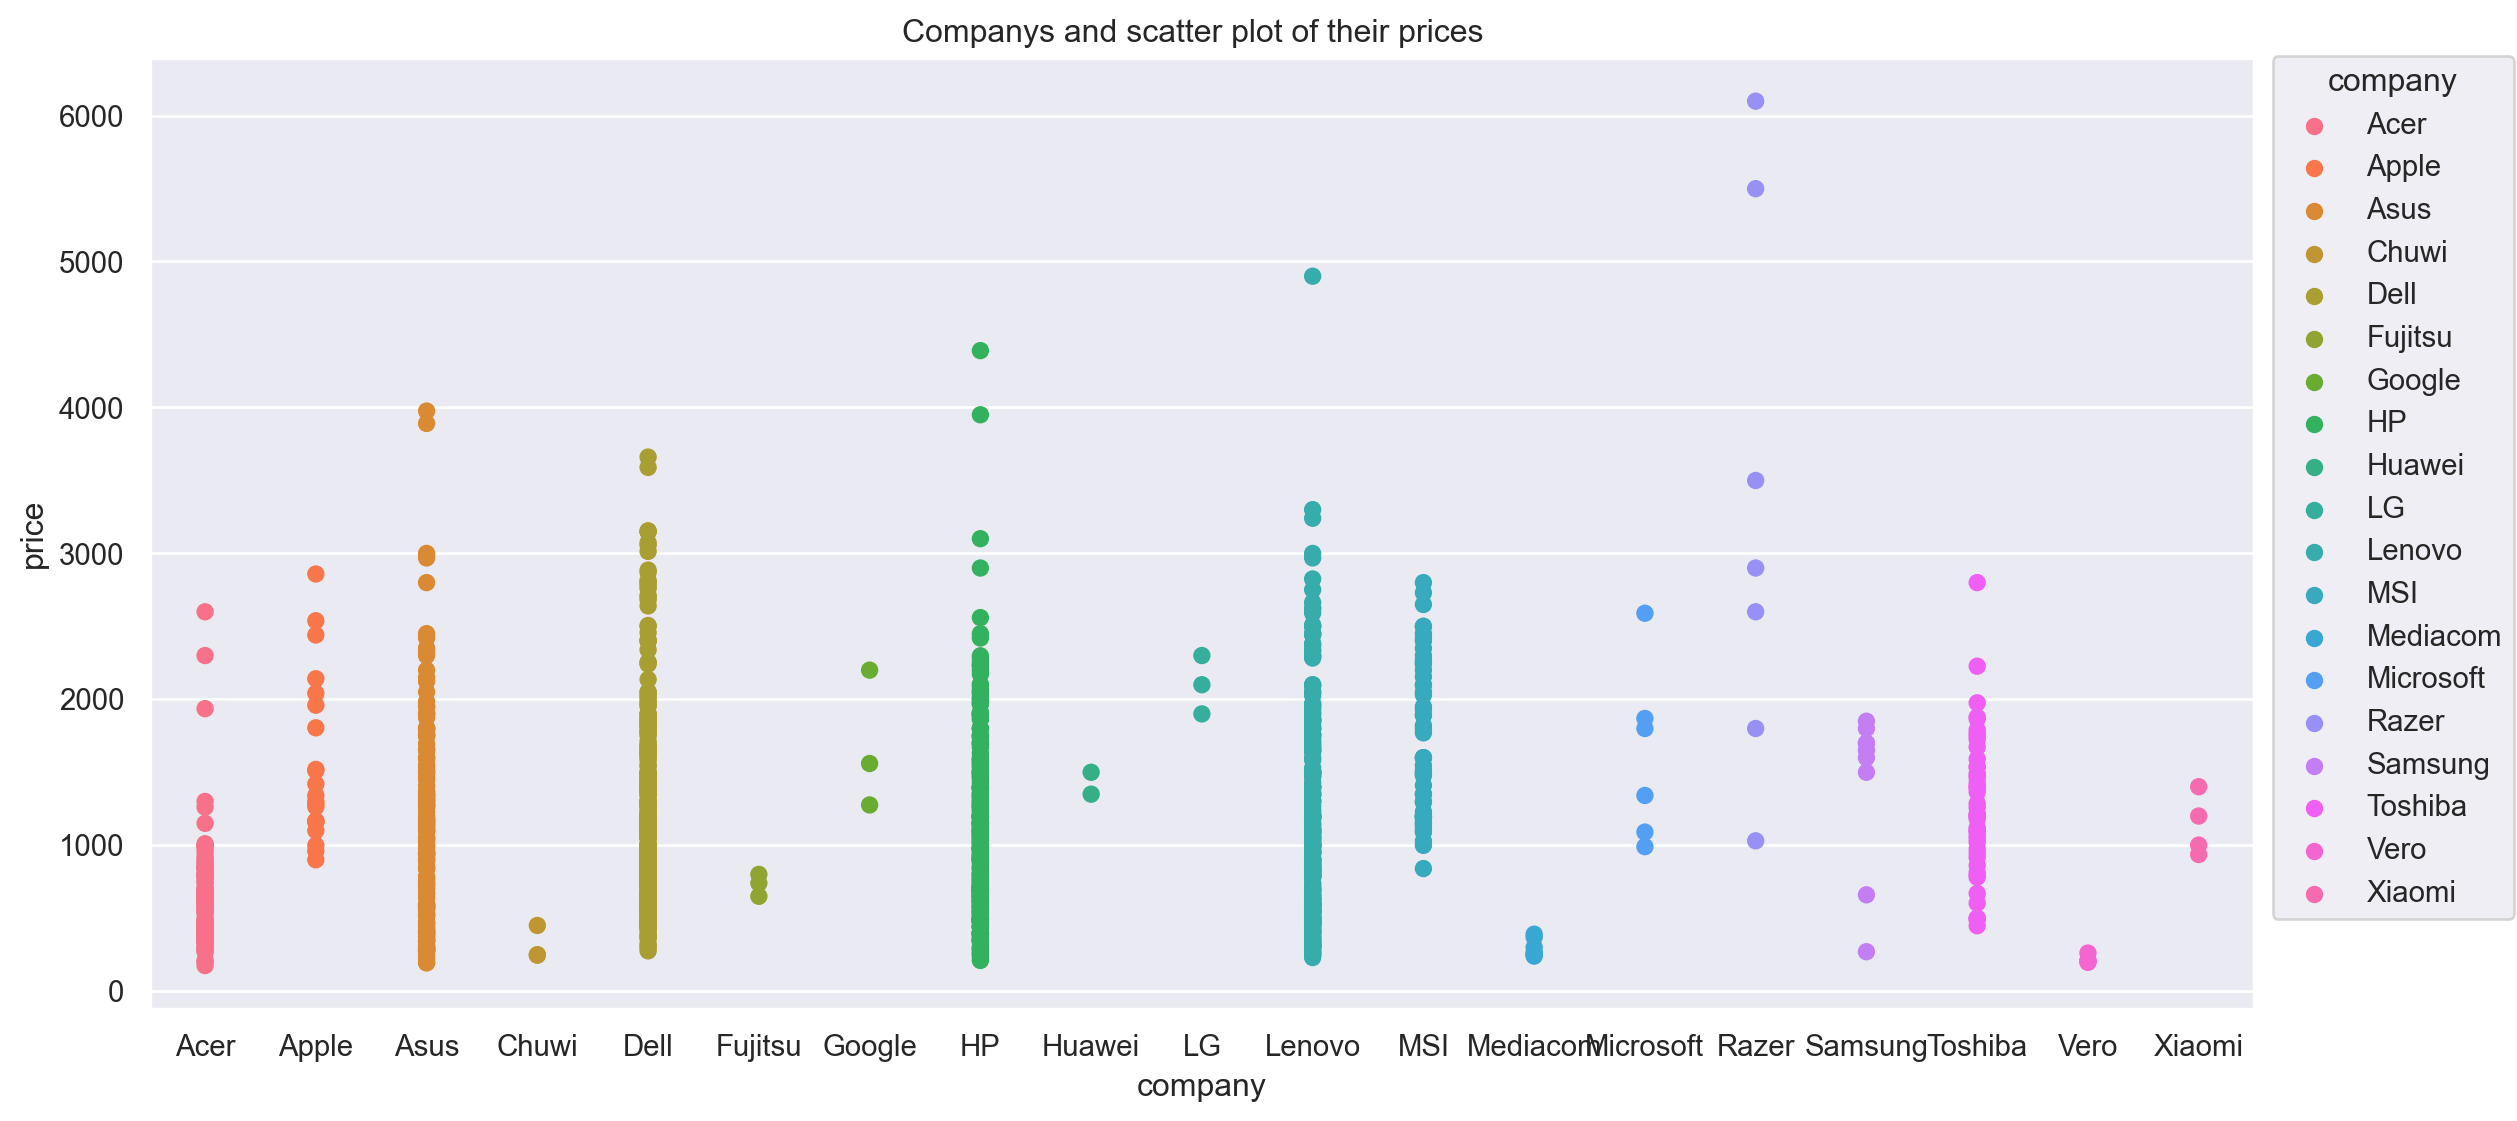

In [287]:
p = (
    so.Plot(df2, x="company", y="price")
    .add(so.Dot(), color="company").layout(size=(12, 6))
)
p.label(x="company", y="price", color="")
p.label(title="Companys and scatter plot of their prices  ")

In [367]:
df.Ram.unique() 
ram_ord=['64GB','32GB','24GB','16GB','12GB','8GB','6GB','4GB','2GB']

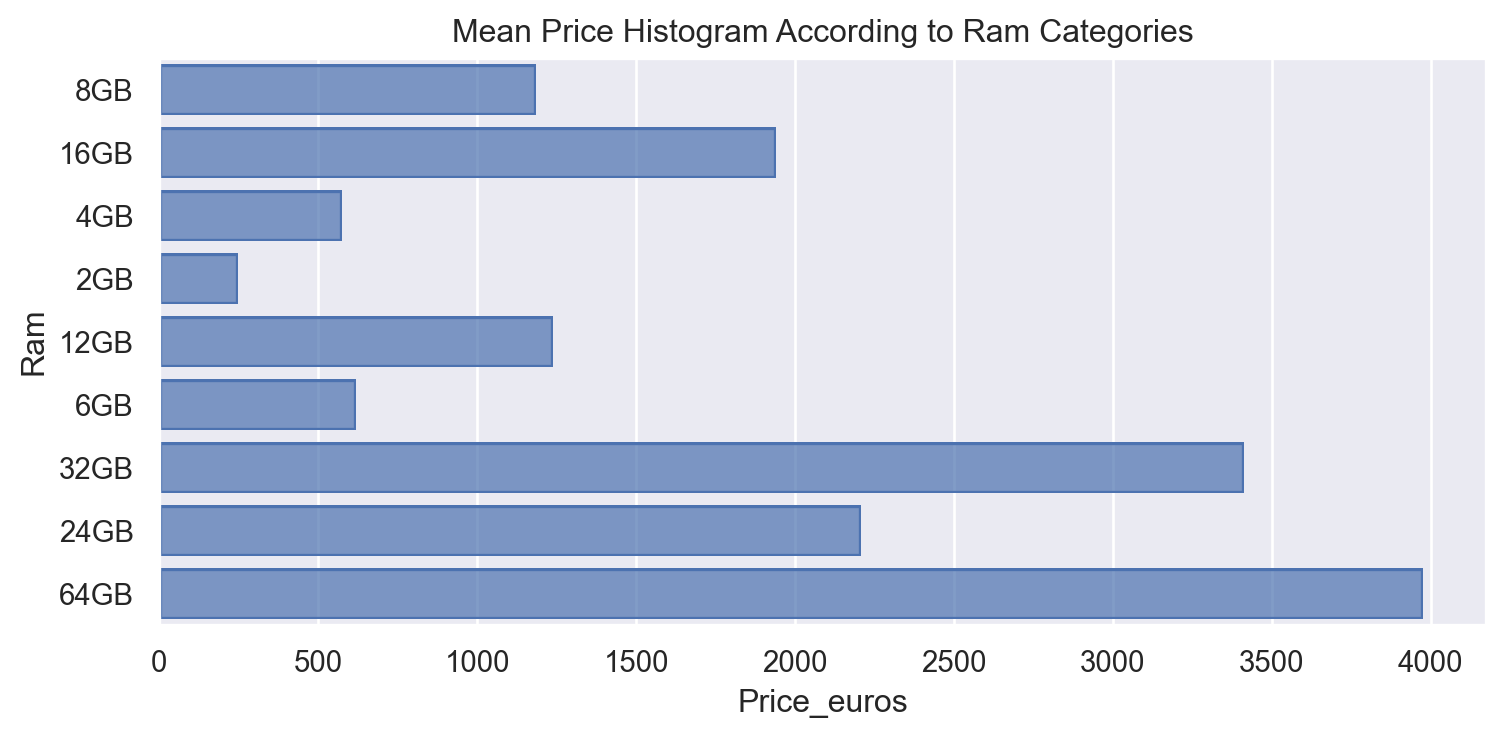

In [371]:
import seaborn.objects as so
mm=so.Plot(df, "Price_euros", "Ram").add(so.Bar(), so.Agg()).layout(size=(8, 4))  #,hue_order=ram_ord
mm.label(title="Mean Price Histogram According to Ram Categories")
# higher  ram  means heigher price !!

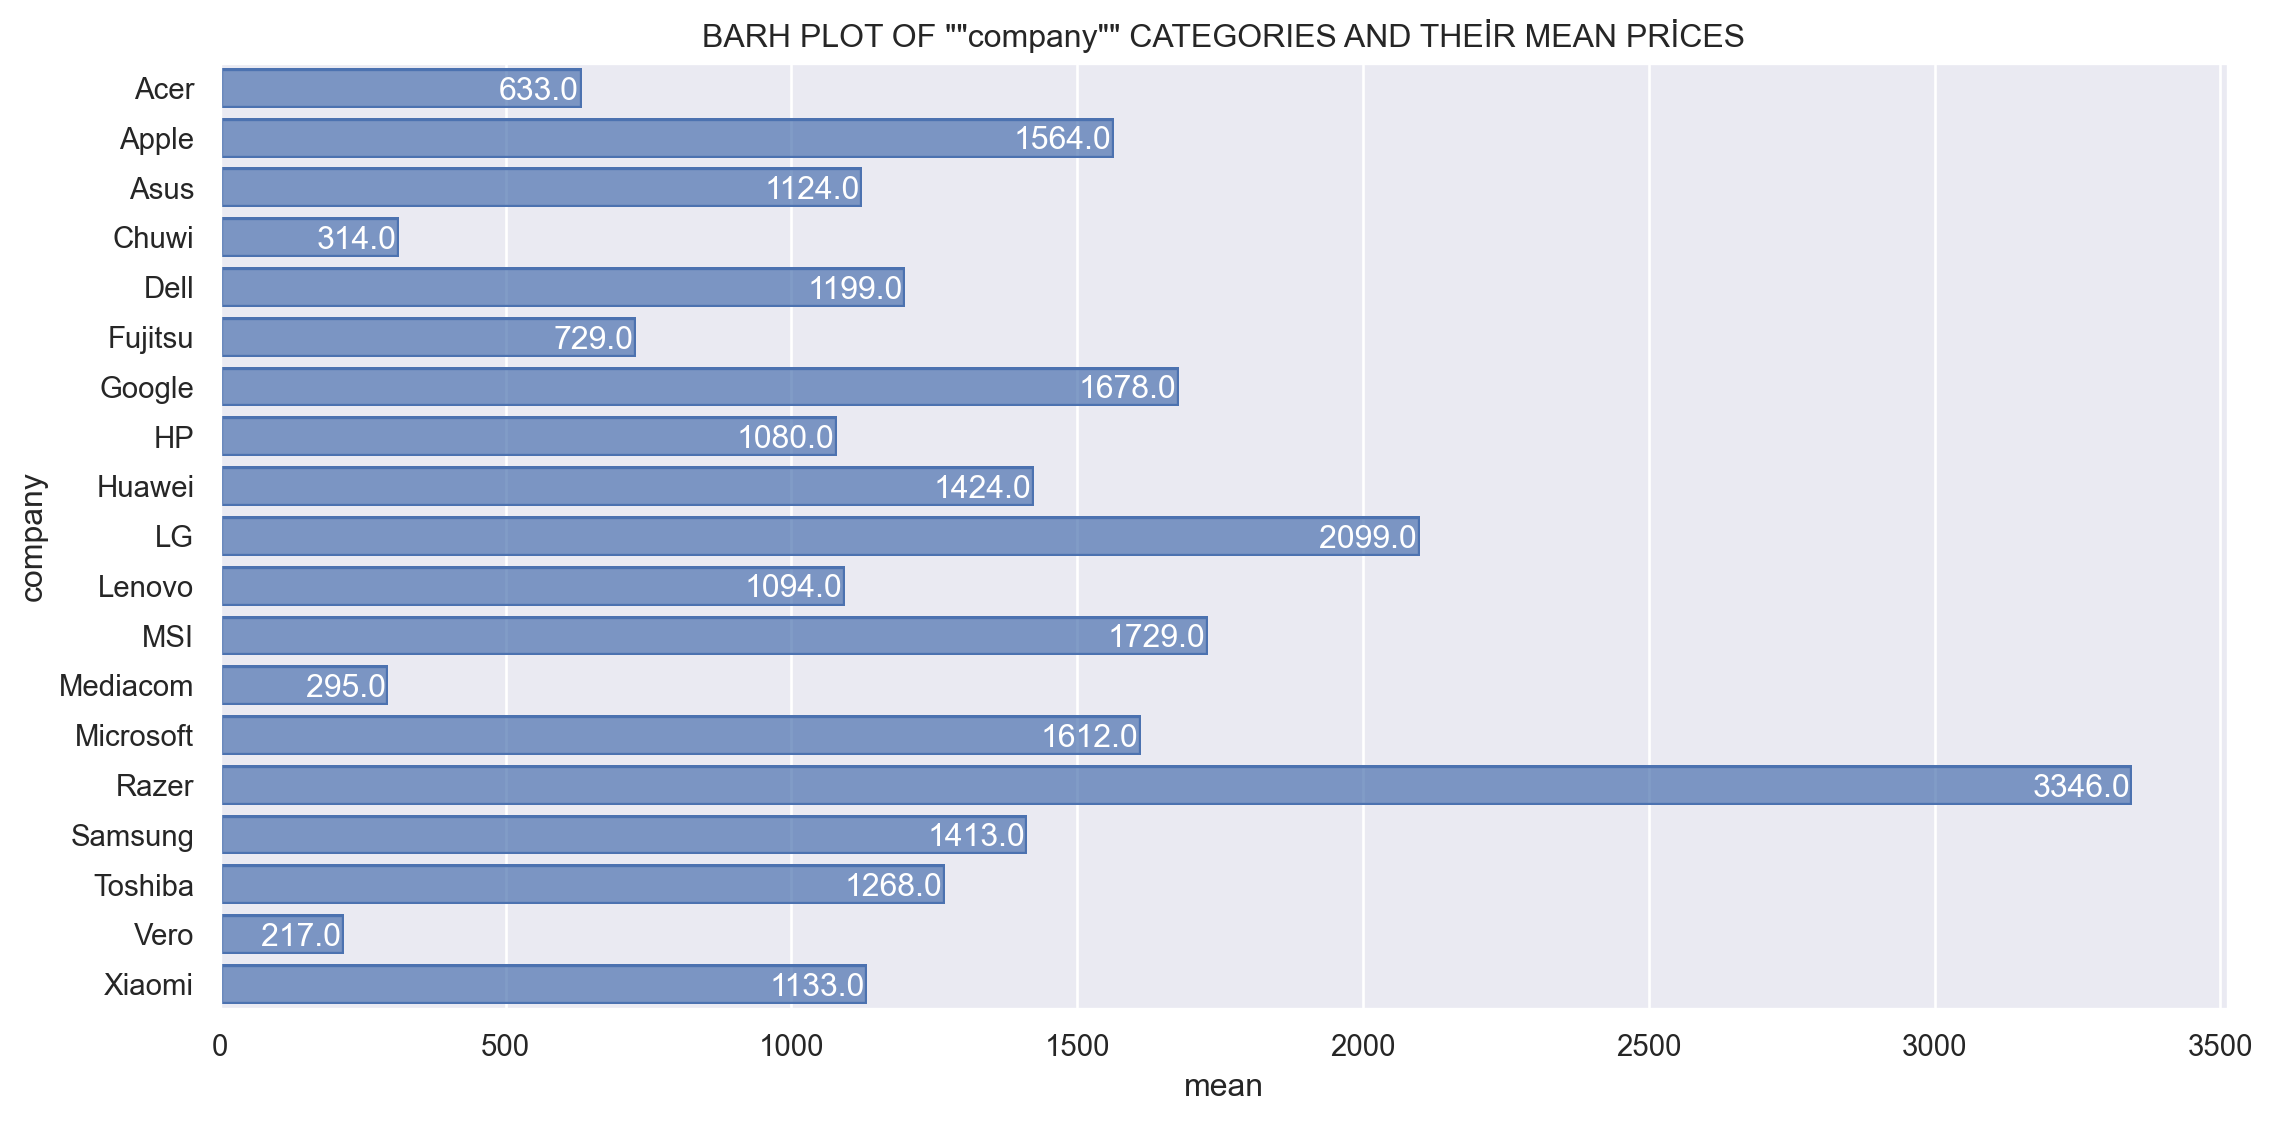

In [605]:
(
    so.Plot(graph, x="mean", y="company", text="mean").label(title='BARH PLOT OF ""company"" CATEGORIES AND THEİR MEAN PRİCES')
    .add(so.Bar())
    .add(so.Text(color="w", halign="right", offset=1)).layout(size=(12, 6))
)

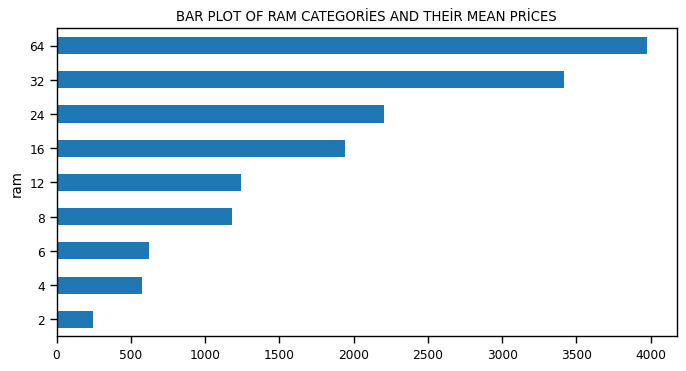

In [476]:
graph_ram=pd.DataFrame(df2.groupby('ram')['price'].agg(['mean','min','max']),columns=['mean','min','max'])
graph_ram['mean']=np.round(graph_ram['mean'])
graph_ram['mean'].plot.barh(title='BAR PLOT OF RAM CATEGORİES AND THEİR MEAN PRİCES',figsize=(8,4));


 * **The graph above  clearly indicates  that :**
 * one of the most important feature is ram for laptop prices, higher ram is heigher price

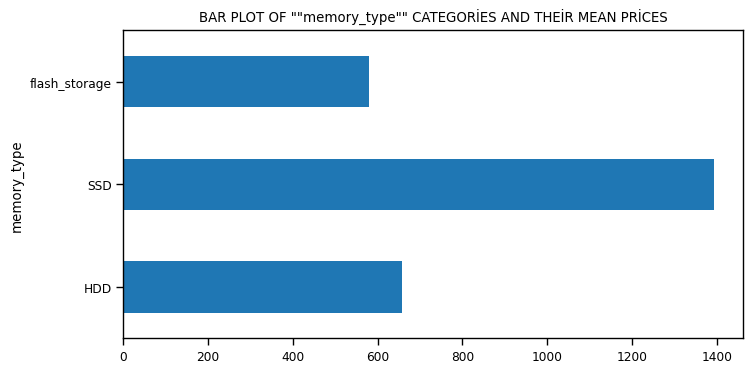

In [506]:
graph_memory_type=pd.DataFrame(df2.groupby('memory_type')['price'].agg(['mean','min','max']),columns=['mean','min','max'])
graph_memory_type['mean'].plot.barh(title='BAR PLOT OF ""memory_type"" CATEGORİES AND THEİR MEAN PRİCES',figsize=(8,4));

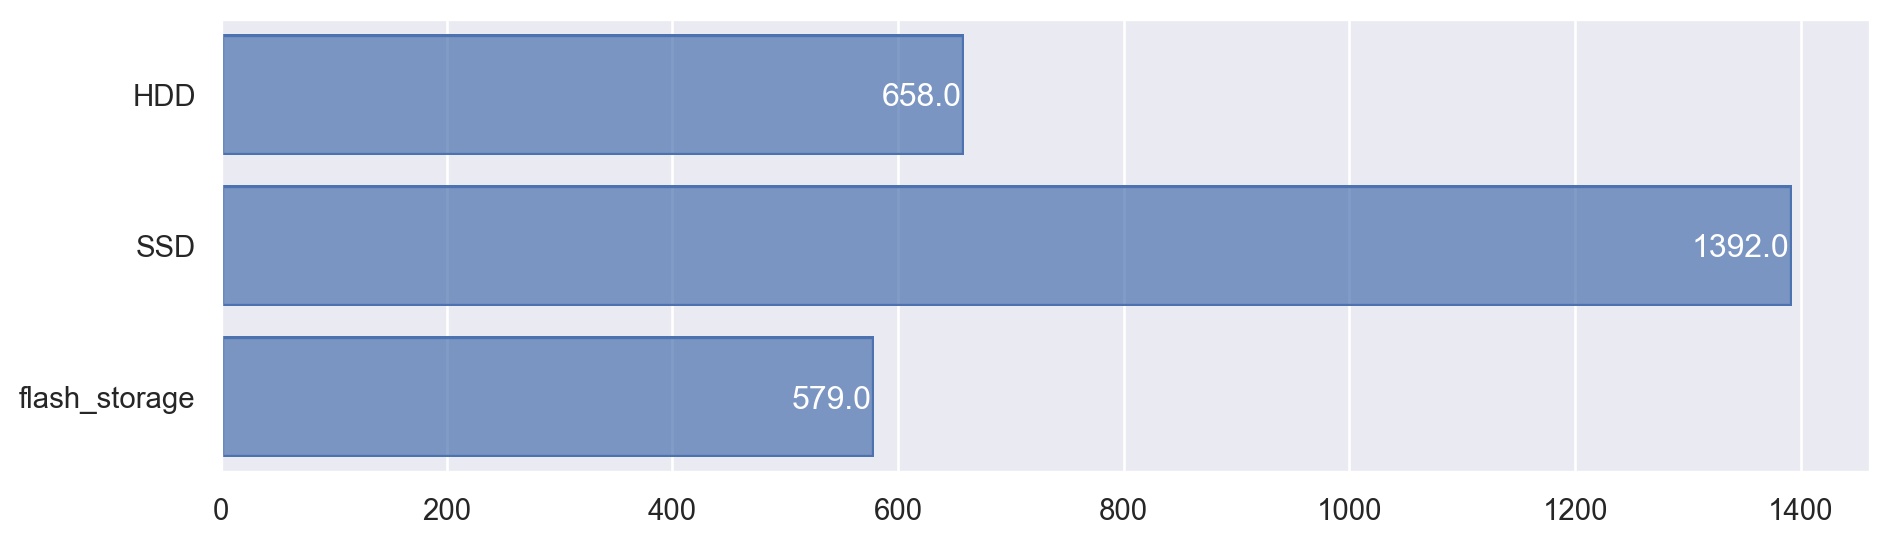

In [606]:
df_mem_type=df2[['memory_type','memory_size','Inches','cpu_speed','extra_memory','ram','weight','price']].groupby(['memory_type']).agg(['mean']).copy()



(
    so.Plot(df_mem_type, x=list(df_mem_type['price']['mean']), y=['HDD', 'SSD', 'flash_storage'], text=list(round(df_mem_type.price['mean'])))
    .add(so.Bar())
    .add(so.Text(color="w", halign="right", offset=1)).layout(size=(10, 3))
)

 * **The graph above  clearly indicates  that :**
 *  Computers which uses SSD typed memory have more than 2 times mean price than other memory types

In [500]:
df2.memory_type.value_counts()

SSD              837
HDD              359
flash_storage     79
Name: memory_type, dtype: int64

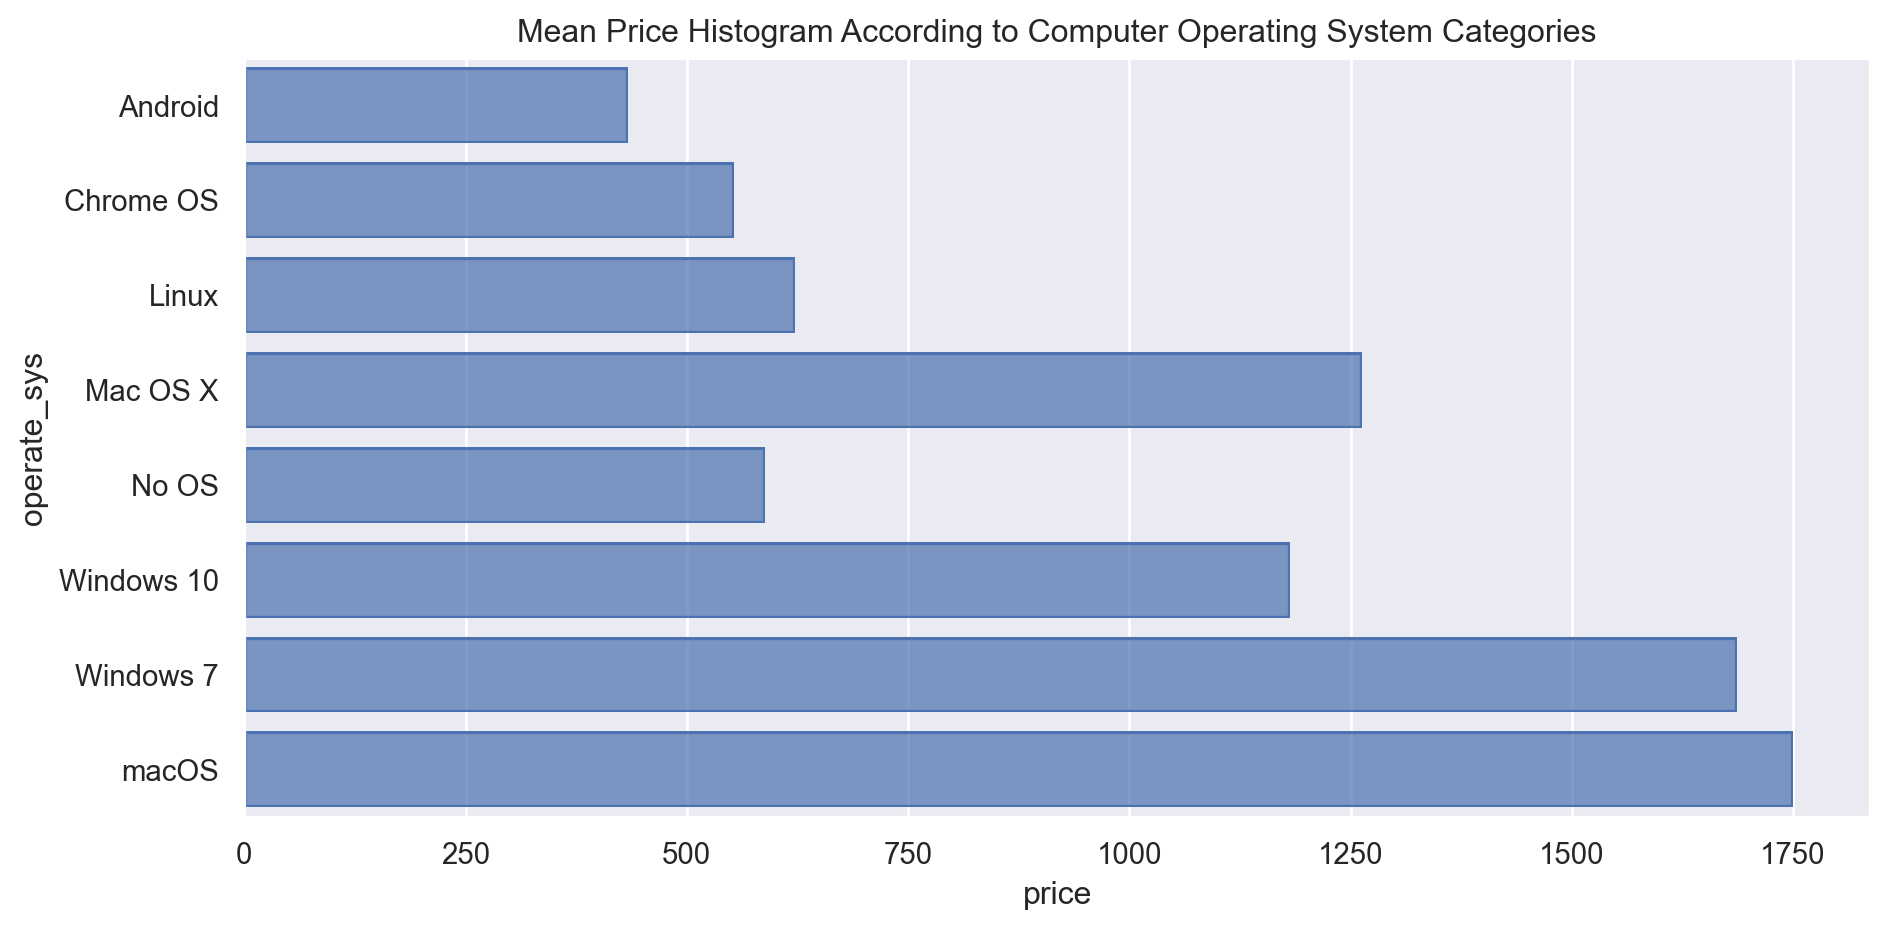

In [332]:
import seaborn.objects as so
mm=so.Plot(df2, "price", "operate_sys").add(so.Bar(), so.Agg()).layout(size=(10, 5))
mm.label(title="Mean Price Histogram According to Computer Operating System Categories")


**The graph above shows that:**
* macOs operating system installed laptops which is used by  Apple company  have  heighest mean price point**
* Android operating system installed laptops  have  lowest mean price point**
* İnterestingly  windows7  operating system installed laptops  have second heighest mean price point but this indicates that many datas are very old **


In [655]:
df2[df2.operate_sys=='Windows 7'].head(3)

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
525,14.0,0,Lenovo,Notebook,ThinkPad,0,1920x1080,Intel Core i5,2.3,8,256,SSD,0,Intel,520,0,0,Windows 7,2.02,1340.0
621,14.0,0,Lenovo,Notebook,ThinkPad,0,1920x1080,Intel Core i5,2.3,8,256,SSD,0,Intel,520,0,0,Windows 7,1.65,1465.0
624,15.6,0,HP,Notebook,EliteBook,0,1366x768,Intel Core i5,2.3,4,500,HDD,0,Intel,520,0,0,Windows 7,1.88,932.0


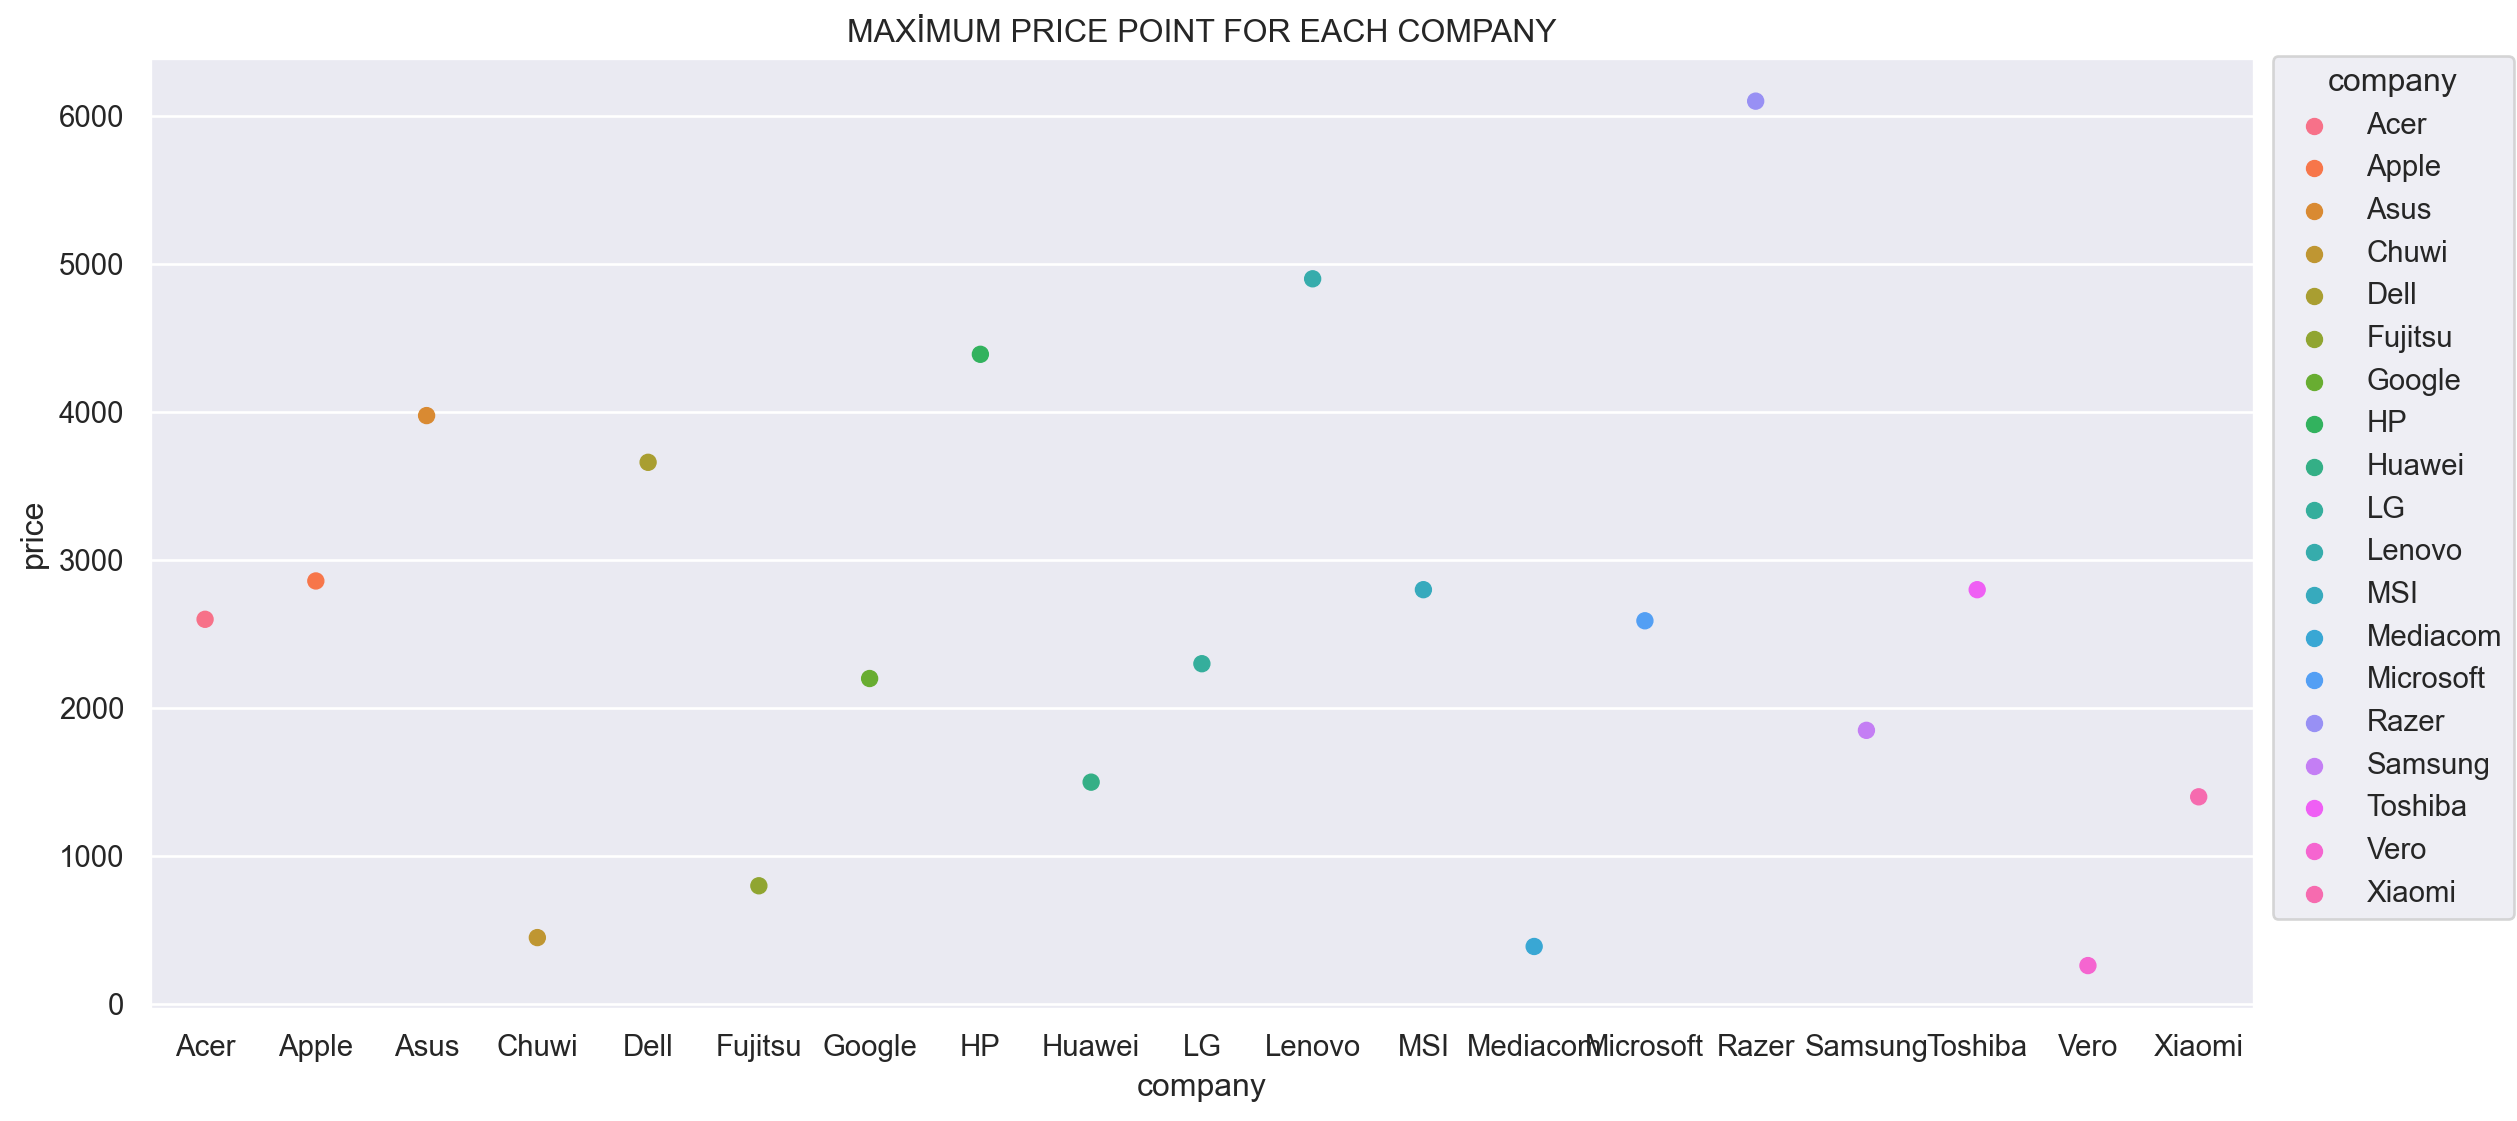

In [513]:
import seaborn.objects as so
sns.color_palette("husl", 9)
p1 = so.Plot(df2, "company", "price").label(title="MAXİMUM PRICE POINT FOR EACH COMPANY")
#p1.add(so.Dot(),title="Mean Price Histogram According to Ram Categories")
p1.add(so.Dot(), so.Agg('max'), color="company",legend=True).layout(size=(12, 6))
#p1.label(title="Mean Price Histogram According to Ram Categories")

**The graph above shows that:**
* Top 5 companies which sels heighest priced laptops --  more than 3000 dollars --   are Razer,Lenovo,Hp,Asus and Dell
* The 5 companies that sell the lowest priced laptops are --  less than 1000 dollars -- are Vero,Mediacom,Chuwi,Fujitsu and Huawei, respectively.
 

C:\Users\bayramlar\AppData\Local\Temp\ipykernel_7032\356524727.py:1: FutureWarning: ['company', 'compt_type', 'productt', 'cpu_name', 'memory_type', 'gpu_brand', 'gpu_name', 'operate_sys'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df2.groupby(['int_ScreenResolution']).agg(['mean','min','max'])
C:\Users\bayramlar\AppData\Local\Temp\ipykernel_7032\356524727.py:2: FutureWarning: ['company', 'compt_type', 'productt', 'cpu_name', 'memory_type', 'gpu_brand', 'gpu_name', 'operate_sys'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_screen=df2.groupby(['int_ScreenResolution']).agg(['mean','min','max']).copy()


<Axes: title={'center': 'RESOLUTİON VS MEAN PRICES '}, ylabel='int_ScreenResolution'>

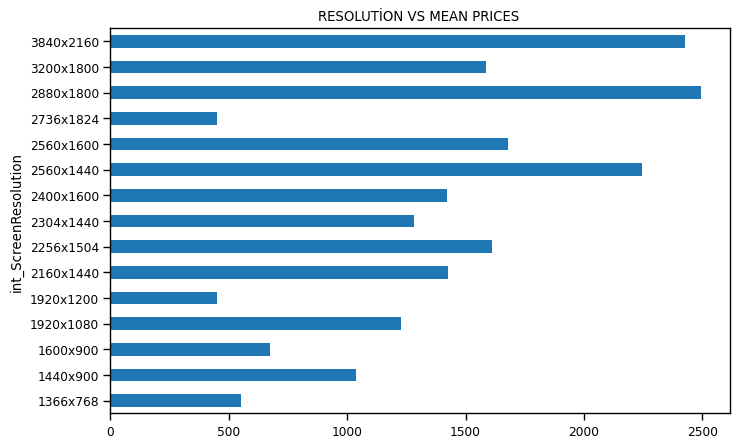

In [580]:
df2.groupby(['int_ScreenResolution']).agg(['mean','min','max'])
df_screen=df2.groupby(['int_ScreenResolution']).agg(['mean','min','max']).copy()
df_screen.price['mean'].plot(kind='barh',title='RESOLUTİON VS MEAN PRICES ',figsize=(8,5))

In [572]:
list(round(df_screen.price['mean']))

[551.0,
 1039.0,
 674.0,
 1229.0,
 452.0,
 1424.0,
 1612.0,
 1280.0,
 1423.0,
 2244.0,
 1680.0,
 449.0,
 2494.0,
 1585.0,
 2425.0]

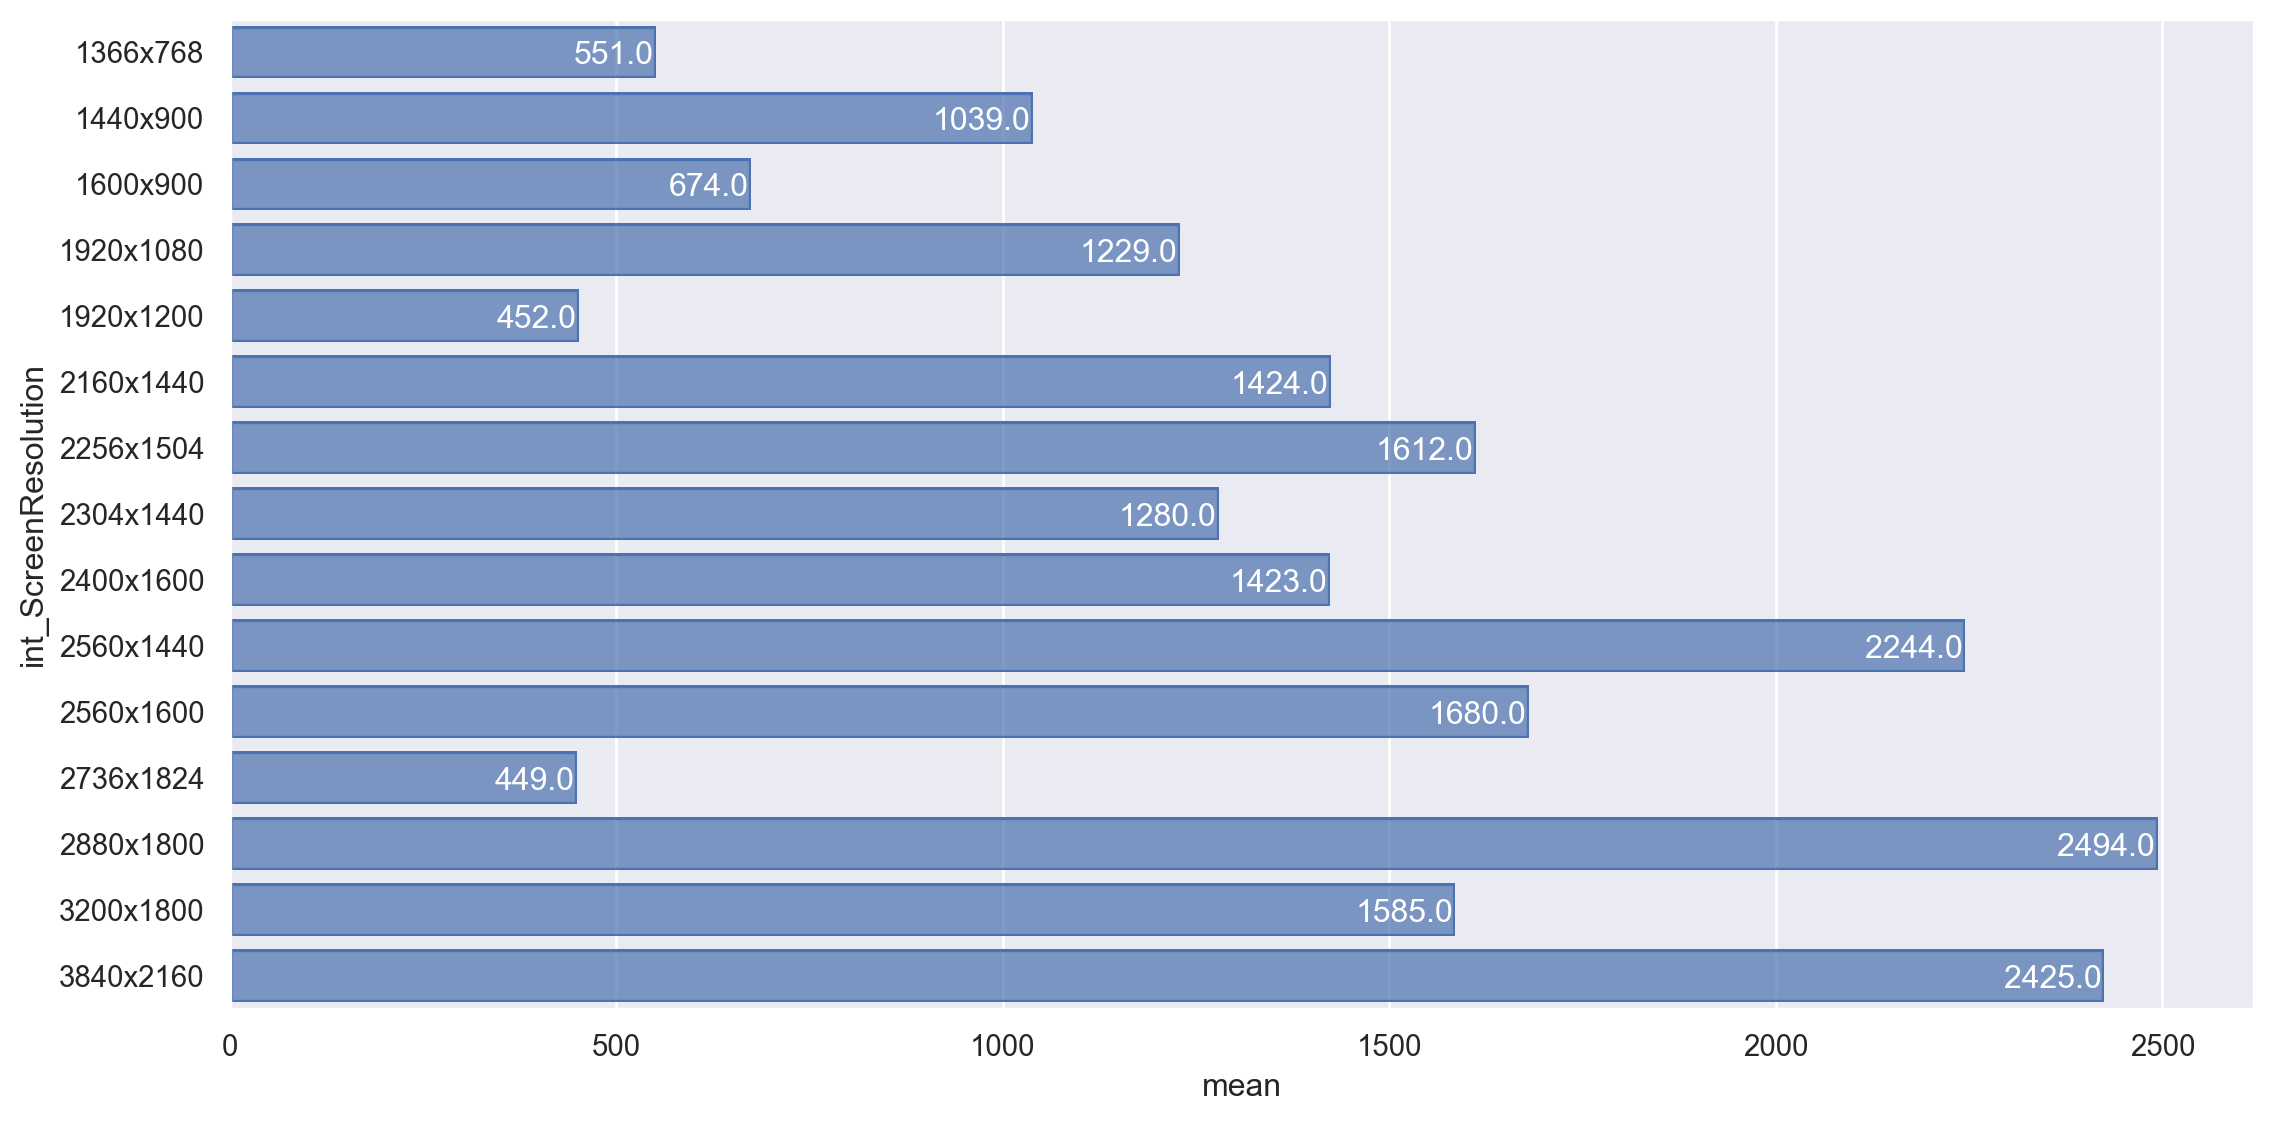

In [576]:
(
    so.Plot(df_screen, x=df_screen['price']['mean'], y=df_screen.index, text=list(round(df_screen.price['mean'])))
    .add(so.Bar())
    .add(so.Text(color="w", halign="right", offset=1)).layout(size=(12, 6))
)

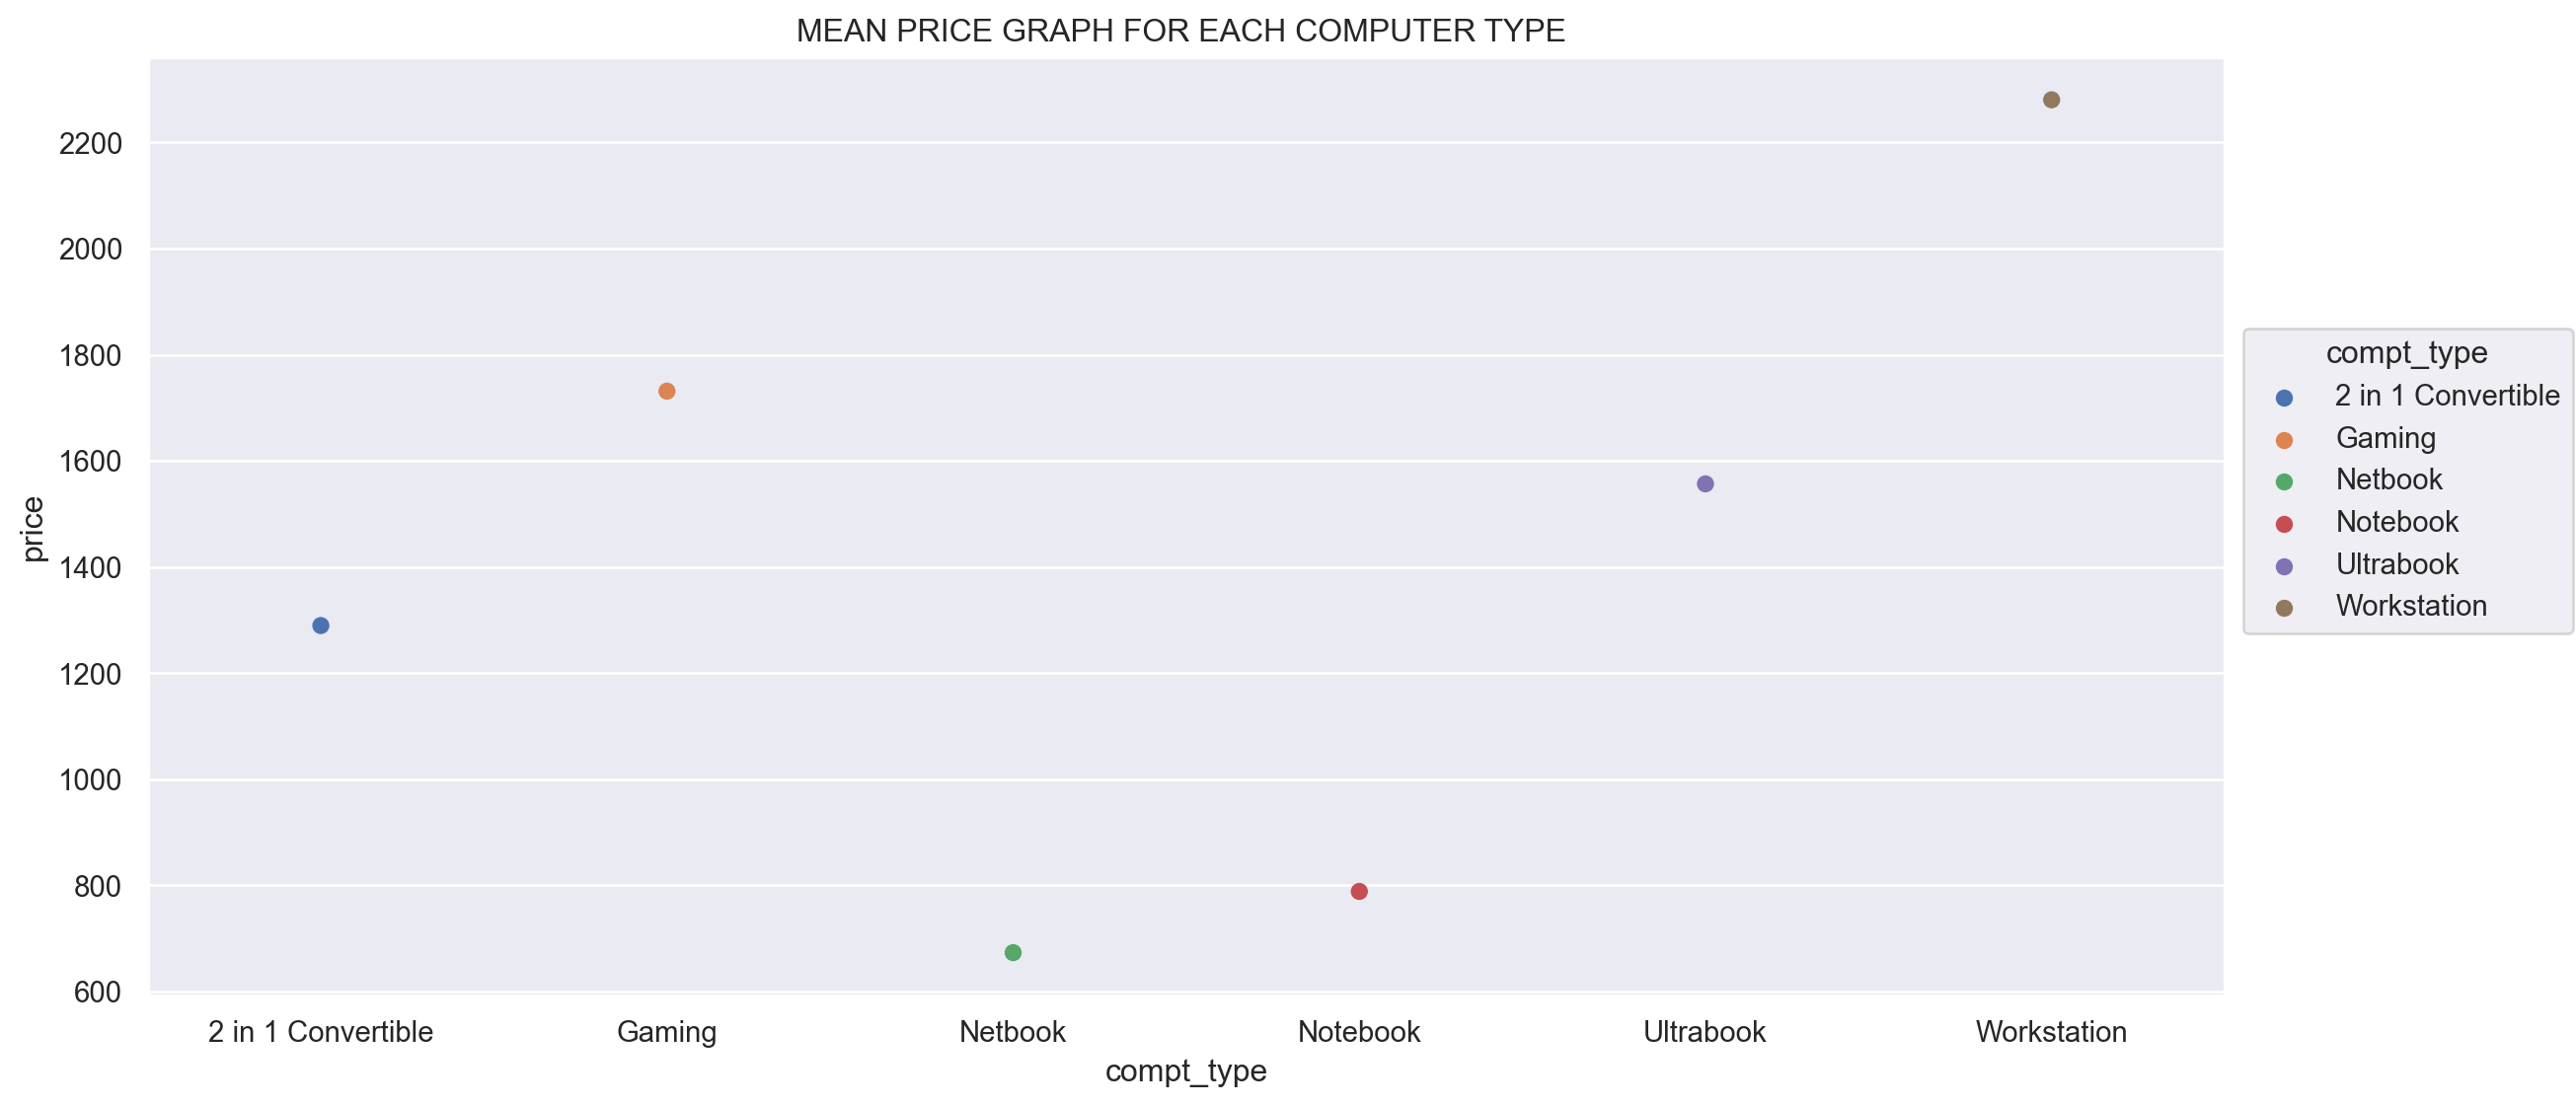

In [536]:

p4= so.Plot(df2, "compt_type", "price").label(title="MEAN PRICE GRAPH FOR EACH COMPUTER TYPE ")
#p1.add(so.Dot(),title="Mean Price Histogram According to Ram Categories")
p4.add(so.Dot(), so.Agg('mean'), color="compt_type").layout(size=(12, 6))
#p1.label(title="Mean Price Histogram According to Ram Categories")

**The mean price for each computer_type is shown according to each company:**
* Gaming and  Ultrabook categories are usually  the most expensive categories for companies
* Mostly Netbook and Notebook  categories are  the cheapest categories for computer producers..

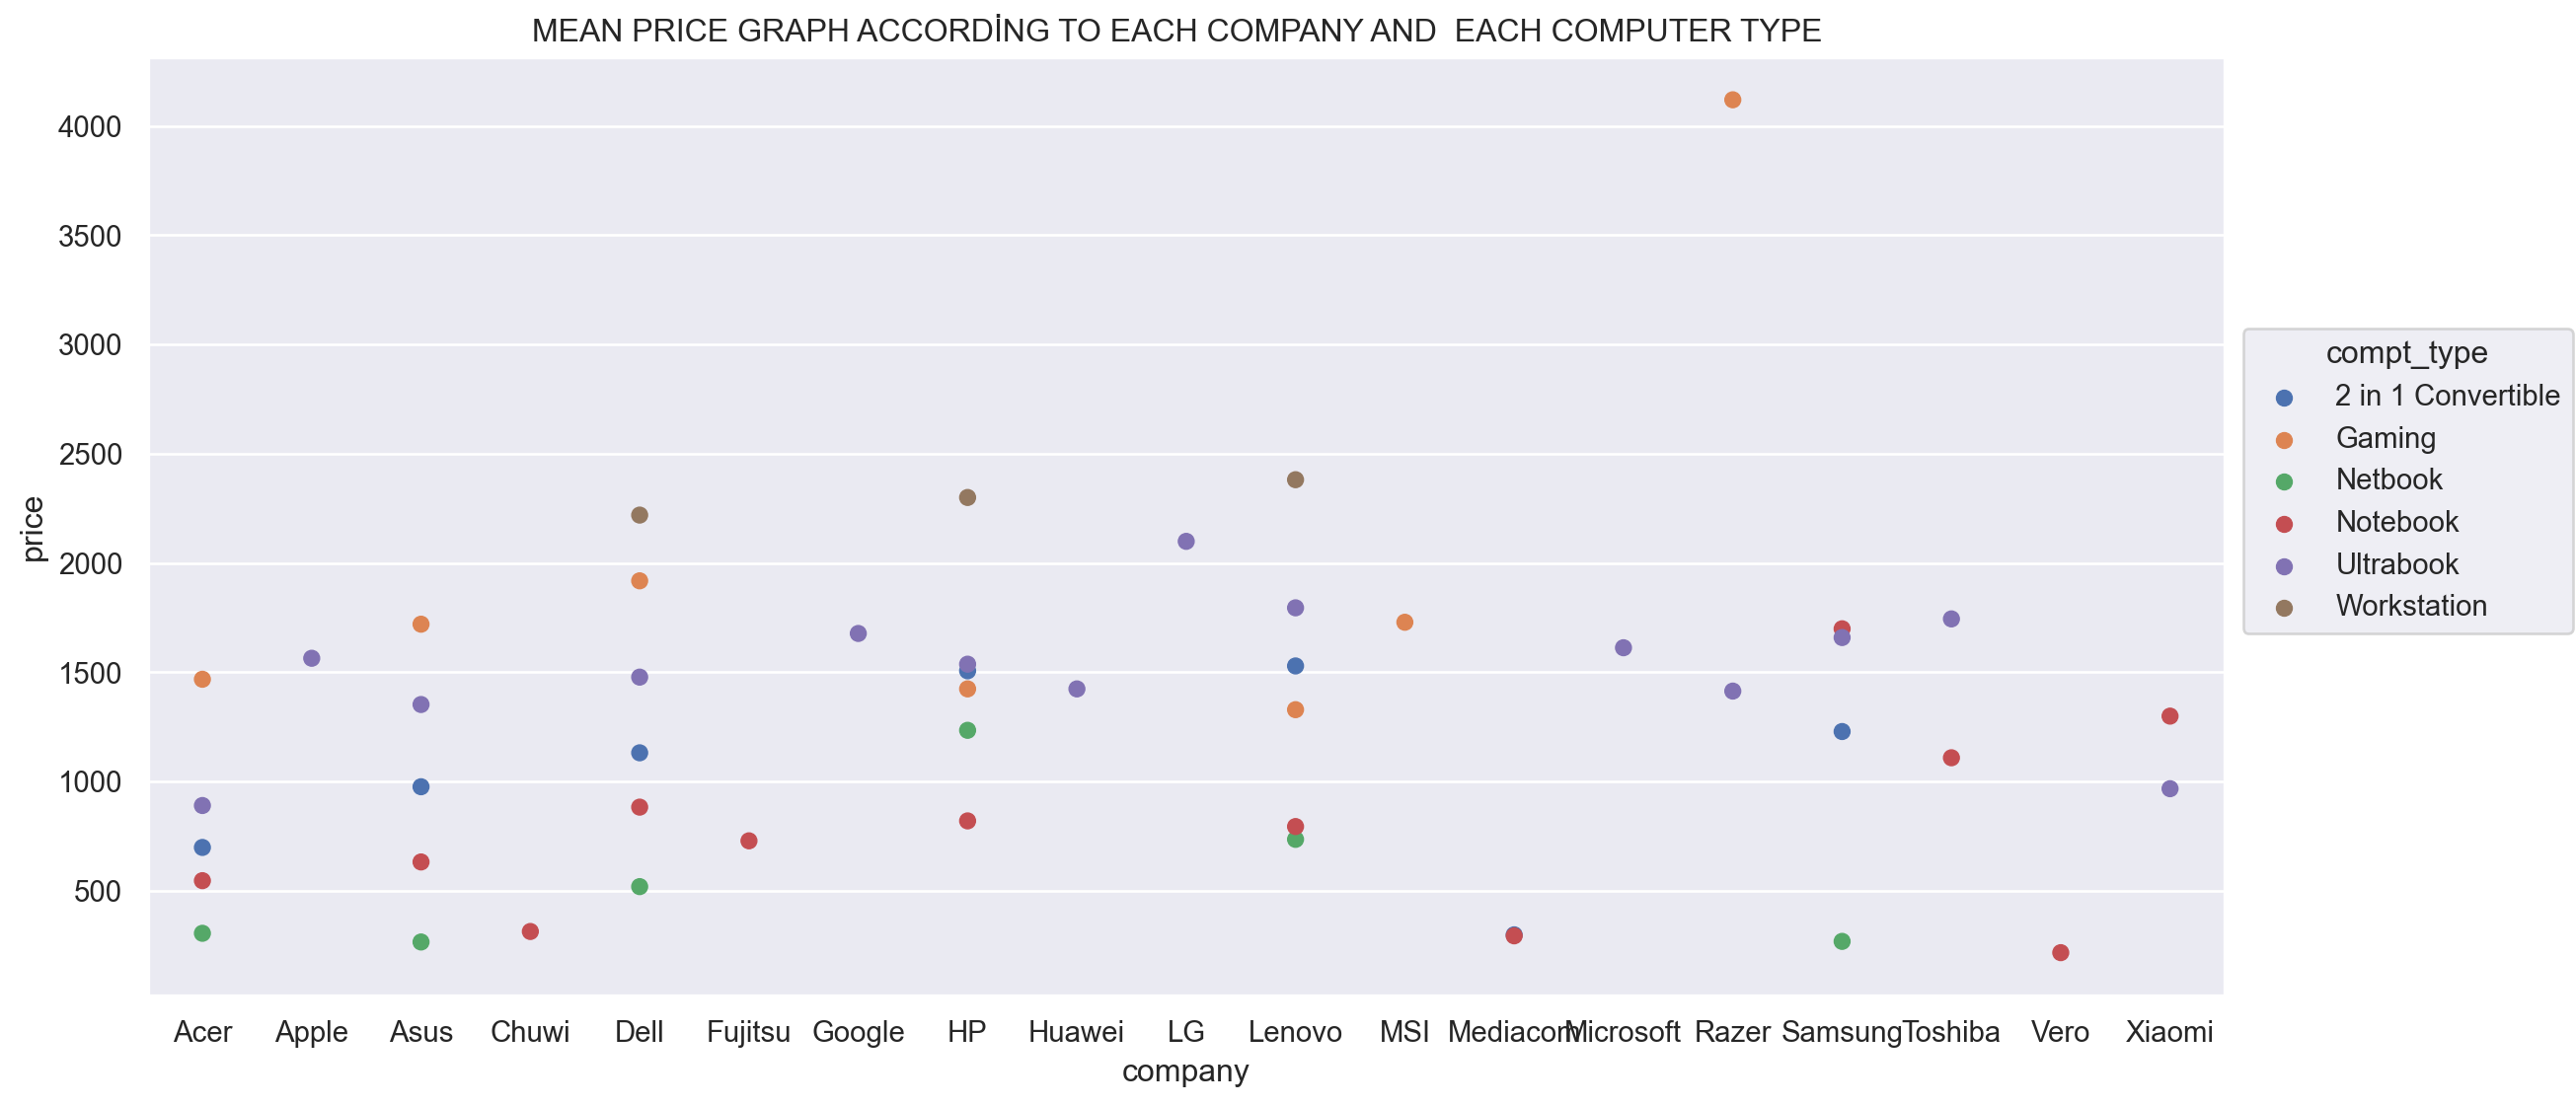

In [538]:
import seaborn.objects as so
sns.color_palette("husl", 9)
p3= so.Plot(df2, "company", "price").label(title="MEAN PRICE GRAPH ACCORDİNG TO EACH COMPANY AND  EACH COMPUTER TYPE  ")
#p1.add(so.Dot(),title="Mean Price Histogram According to Ram Categories")
p3.add(so.Dot(), so.Agg('mean'), color="compt_type").layout(size=(12, 6))
#p1.label(title="Mean Price Histogram According to Ram Categories")

**The mean price for each computer_type is shown  for each company:**
* Gaming and  Ultrabook categories are usually  the most expensive categories for companies
* Mostly Netbook and Notebook  categories are  the cheapest categories for computer producers..

In [680]:
df_company_agg=pd.DataFrame(df2.groupby(['company']).agg(['mean','min','max'])['price'],columns=['mean','min','max'])
df_company_agg

C:\Users\bayramlar\AppData\Local\Temp\ipykernel_7032\352206151.py:1: FutureWarning: ['compt_type', 'productt', 'int_ScreenResolution', 'cpu_name', 'memory_type', 'gpu_brand', 'gpu_name', 'operate_sys'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_company_agg=pd.DataFrame(df2.groupby(['company']).agg(['mean','min','max'])['price'],columns=['mean','min','max'])


,mean,min,max
company,,,
Acer,633.464455,174.00,2599.00
Apple,1564.198571,898.94,2858.00
Asus,1123.829737,191.90,3975.00
Chuwi,314.296667,244.99,449.00
Dell,1199.225120,274.90,3659.40
Fujitsu,729.000000,649.00,799.00
Google,1677.666667,1275.00,2199.00
HP,1080.314664,209.00,4389.00
Huawei,1424.000000,1349.00,1499.00


In [681]:
mean_list1=list(df_company_agg['mean'])
min_list1=list(df_company_agg['min'])
max_list1=list(df_company_agg['max'])
index_list1=list(df_company_agg.index)
index_list1

['Acer',
 'Apple',
 'Asus',
 'Chuwi',
 'Dell',
 'Fujitsu',
 'Google',
 'HP',
 'Huawei',
 'LG',
 'Lenovo',
 'MSI',
 'Mediacom',
 'Microsoft',
 'Razer',
 'Samsung',
 'Toshiba',
 'Vero',
 'Xiaomi']

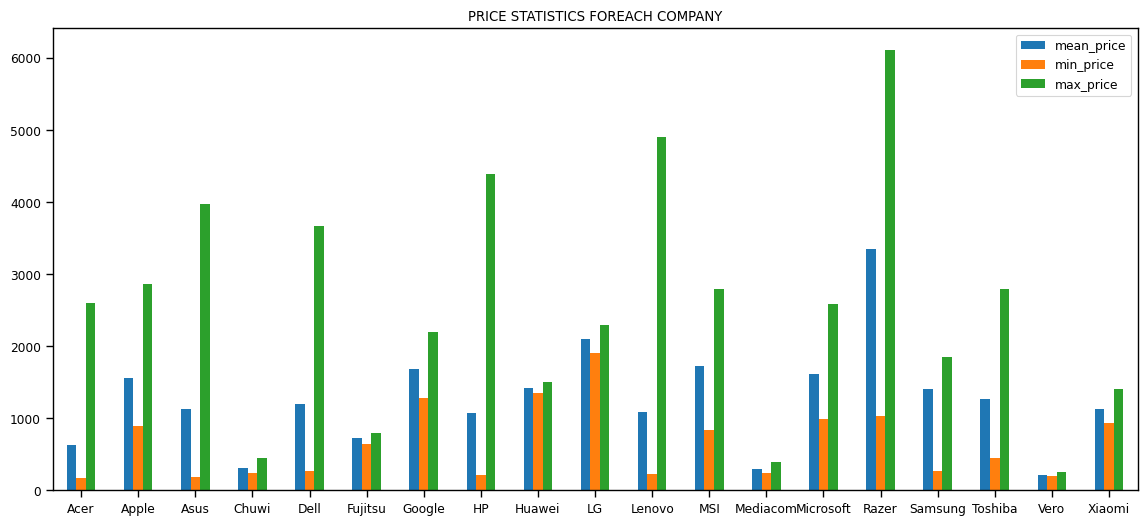

In [682]:
dfg1 = pd.DataFrame({'mean_price': mean_list1,

                   'min_price': min_list1,
                   'max_price': max_list1}, index=index_list1)

ax1 = dfg1.plot.bar(rot=0,figsize=(14,6),title='PRICE STATISTICS FOREACH COMPANY')


In [585]:
df2[['memory_type','memory_size','Inches','cpu_speed','extra_memory','ram','weight','price']].groupby(['memory_type']).agg(['mean'])

,memory_size,Inches,cpu_speed,extra_memory,ram,weight,price
,mean,mean,mean,mean,mean,mean,mean
memory_type,,,,,,,
HDD,883.387187,15.626462,2.227354,2.852368,5.860724,2.209304,658.401226
SSD,282.203106,14.940502,2.403274,265.758662,9.882915,2.024695,1391.896547
flash_storage,169.873418,13.153165,1.584051,12.962025,4.886076,1.441266,578.507595


In [595]:
list(df_mem_type['price']['mean'])
df_mem_type.index
list(round(df_mem_type.price['mean']))

[658.0, 1392.0, 579.0]

# **MODELLING**

In [14]:
categorical_cols = df2.select_dtypes(include='category').columns
numerical_cols = df2.select_dtypes(exclude='category').columns
numerical_cols=list(numerical_cols)[:-1]
numerical_cols


['Inches',
 'isIps',
 'isTouchScreen',
 'cpu_speed',
 'ram',
 'memory_size',
 'extra_memory',
 'isRetina',
 'isQuadscr',
 'weight']

In [15]:
categorical_cols

Index(['company', 'compt_type', 'productt', 'int_ScreenResolution', 'cpu_name',
       'memory_type', 'gpu_brand', 'gpu_name', 'operate_sys'],
      dtype='object')

In [16]:
df2[numerical_cols].head(3)

,Inches,isIps,isTouchScreen,cpu_speed,ram,memory_size,extra_memory,isRetina,isQuadscr,weight
0,13.3,1,0,2.3,8,128,0,1,0,1.37
1,13.3,0,0,1.8,8,128,0,0,0,1.34
2,15.6,0,0,2.5,8,256,0,0,0,1.86


In [17]:
df3=df2.copy()

In [162]:
# CLEANING  SPECİAL CHRACHTERS !!

import re
#re.compile('<title>(.*)</title>')

df33=df2.copy()
for col in categorical_cols:
    df33[col]=df33[col].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
    print(df33[col].value_counts().head(55))


Dell         297

Lenovo       297

HP           274

Asus         158

Acer         103

MSI           54

Toshiba       48

Apple         21

Samsung        9

Mediacom       7

Microsoft      6

Vero           4

Xiaomi         4

Google         3

Fujitsu        3

Chuwi          3

LG             3

Huawei         2

Name: company, dtype: int64

Notebook              727

Gaming                200

Ultrabook             194

2 in 1 Convertible    121

Workstation            29

Netbook                25

Name: compt_type, dtype: int64

other prod       560

Inspiron         123

IdeaPad           72

ProBook           49

Aspire            44

ThinkPad          43

EliteBook         41

XPS               39

Latitude          39

Vostro            27

250               24

Legion            23

Yoga              22

Alienware         19

MacBook           19

Probook           18

Satellite         13

Thinkpad          13

ZBook             11

VivoBook          11

Spectre      

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Inches                1275 non-null   float64 
 1   isIps                 1275 non-null   int8    
 2   company               1275 non-null   category
 3   compt_type            1275 non-null   category
 4   productt              1275 non-null   category
 5   isTouchScreen         1275 non-null   int8    
 6   int_ScreenResolution  1275 non-null   category
 7   cpu_name              1275 non-null   category
 8   cpu_speed             1275 non-null   float64 
 9   ram                   1275 non-null   int16   
 10  memory_size           1275 non-null   int16   
 11  memory_type           1275 non-null   category
 12  extra_memory          1275 non-null   int16   
 13  gpu_brand             1275 non-null   category
 14  gpu_name              1275 non-null   category
 15  isRe

In [19]:
df3.head(2)

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,13.3,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,2.3,8,128,SSD,0,Intel,640,1,0,macOS,1.37,1339.69
1,13.3,0,Apple,Ultrabook,Macbook,0,1440x900,Intel Core i5,1.8,8,128,flash_storage,0,Intel,6000,0,0,macOS,1.34,898.94


In [20]:
num_scale_cols=['Inches','cpu_speed','ram','memory_size','extra_memory','weight']
df3[num_scale_cols].head(3)

,Inches,cpu_speed,ram,memory_size,extra_memory,weight
0,13.3,2.3,8,128,0,1.37
1,13.3,1.8,8,128,0,1.34
2,15.6,2.5,8,256,0,1.86


##  **SCALİNG THE DATA** 

In [21]:
# SCALİNG  DATAFRAME !
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3[num_scale_cols])
df3[num_scale_cols]=scaled_data

df3[numerical_cols].head(3)

,Inches,isIps,isTouchScreen,cpu_speed,ram,memory_size,extra_memory,isRetina,isQuadscr,weight
0,-1.205746,1,0,-0.005918,-0.086499,-0.866236,-0.423449,1,0,-1.002380
1,-1.205746,0,0,-0.998674,-0.086499,-0.866236,-0.423449,0,0,-1.047227
2,0.403873,0,0,0.391185,-0.086499,-0.515929,-0.423449,0,0,-0.269871


In [22]:
df3

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,-1.205746,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,-0.005918,-0.086499,-0.866236,SSD,-0.423449,Intel,640,1,0,macOS,-1.002380,1339.69
1,-1.205746,0,Apple,Ultrabook,Macbook,0,1440x900,Intel Core i5,-0.998674,-0.086499,-0.866236,flash_storage,-0.423449,Intel,6000,0,0,macOS,-1.047227,898.94
2,0.403873,0,HP,Notebook,250,0,1920x1080,Intel Core i5,0.391185,-0.086499,-0.515929,SSD,-0.423449,Intel,620,0,0,No OS,-0.269871,575.00
3,0.263906,1,Apple,Ultrabook,MacBook,0,2880x1800,Intel Core i7,0.788288,1.483418,0.184684,SSD,-0.423449,AMD,455,1,0,macOS,-0.314718,2537.45
4,-1.205746,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,1.582493,-0.086499,-0.515929,SSD,-0.423449,Intel,650,1,0,macOS,-1.002380,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,-0.715862,1,Lenovo,2 in 1 Convertible,Yoga,1,1920x1080,Intel Core i7,0.391185,-0.871458,-0.866236,SSD,-0.423449,Intel,520,0,0,Windows 10,-0.359566,638.00
1271,-1.205746,1,Lenovo,2 in 1 Convertible,Yoga,1,3200x1800,Intel Core i7,0.391185,1.483418,0.184684,SSD,-0.423449,Intel,520,0,1,Windows 10,-1.107024,1499.00
1272,-0.715862,0,Lenovo,Notebook,IdeaPad,0,1366x768,Intel Celeron Dual,-1.395777,-1.263937,-1.041389,flash_storage,-0.423449,Intel,Graphics,0,0,Windows 10,-0.808041,229.00
1273,0.403873,0,HP,Notebook,15-AC110nv,0,1366x768,Intel Core i7,0.391185,-0.478979,1.585909,HDD,-0.423449,AMD,M330,0,0,Windows 10,0.223452,764.00


In [23]:
df3_scaled=df3.copy()
df3_scaled

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,-1.205746,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,-0.005918,-0.086499,-0.866236,SSD,-0.423449,Intel,640,1,0,macOS,-1.002380,1339.69
1,-1.205746,0,Apple,Ultrabook,Macbook,0,1440x900,Intel Core i5,-0.998674,-0.086499,-0.866236,flash_storage,-0.423449,Intel,6000,0,0,macOS,-1.047227,898.94
2,0.403873,0,HP,Notebook,250,0,1920x1080,Intel Core i5,0.391185,-0.086499,-0.515929,SSD,-0.423449,Intel,620,0,0,No OS,-0.269871,575.00
3,0.263906,1,Apple,Ultrabook,MacBook,0,2880x1800,Intel Core i7,0.788288,1.483418,0.184684,SSD,-0.423449,AMD,455,1,0,macOS,-0.314718,2537.45
4,-1.205746,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,1.582493,-0.086499,-0.515929,SSD,-0.423449,Intel,650,1,0,macOS,-1.002380,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,-0.715862,1,Lenovo,2 in 1 Convertible,Yoga,1,1920x1080,Intel Core i7,0.391185,-0.871458,-0.866236,SSD,-0.423449,Intel,520,0,0,Windows 10,-0.359566,638.00
1271,-1.205746,1,Lenovo,2 in 1 Convertible,Yoga,1,3200x1800,Intel Core i7,0.391185,1.483418,0.184684,SSD,-0.423449,Intel,520,0,1,Windows 10,-1.107024,1499.00
1272,-0.715862,0,Lenovo,Notebook,IdeaPad,0,1366x768,Intel Celeron Dual,-1.395777,-1.263937,-1.041389,flash_storage,-0.423449,Intel,Graphics,0,0,Windows 10,-0.808041,229.00
1273,0.403873,0,HP,Notebook,15-AC110nv,0,1366x768,Intel Core i7,0.391185,-0.478979,1.585909,HDD,-0.423449,AMD,M330,0,0,Windows 10,0.223452,764.00


#  **MODEL-DEVELOPMENT**

##  **LABEL ENCODİNG** 

In [24]:
len(df3[categorical_cols].columns)

9

In [25]:
categ_cols_for_label_enc=['productt','cpu_name','gpu_name']
categ_cols_for_ordi_enc=['company','compt_type','int_ScreenResolution','memory_type','gpu_brand','operate_sys']

### ONE HOT  DÖNÜŞÜMÜ !! -- NOT APPLİED!!!!--

In [420]:
# ONE HOT  DÖNÜŞÜMÜ !!

df4=df33.copy()

print("The original data")
print(df4.head(3))
print("*" * 30)
df_new = pd.get_dummies(df4, columns=categorical_cols)
print("The transformed data using get_dummies")
df_new.head(3)

The original data

     Inches  isIps company compt_type    productt  isTouchScreen  \

0 -1.210510      1   Apple  Ultrabook     MacBook              0   

1 -1.210510      0   Apple  Ultrabook  other_prod              0   

2  0.402839      0      HP   Notebook         250              0   



  int_ScreenResolution       cpu_name  cpu_speed       ram  memory_size  \

0            2560x1600  Intel Core i5  -0.001096 -0.075948    -0.863659   

1             1440x900  Intel Core i5  -0.993487 -0.075948    -0.863659   

2            1920x1080  Intel Core i5   0.395861 -0.075948    -0.513536   



     memory_type  extra_memory gpu_brand gpu_name  isRetina  isQuadscr  \

0            SSD     -0.424826     Intel      640         1          0   

1  flash_storage     -0.424826     Intel     6000         0          0   

2            SSD     -0.424826     Intel      620         0          0   



  operate_sys    weight    price  

0       macOS -1.003120  1339.69  

1       macOS -1.048058

,Inches,isIps,isTouchScreen,cpu_speed,ram,memory_size,extra_memory,isRetina,isQuadscr,weight,...,gpu_name_W5130M,gpu_name_W6150M,operate_sys_Android,operate_sys_Chrome OS,operate_sys_Linux,operate_sys_Mac OS X,operate_sys_No OS,operate_sys_Windows 10,operate_sys_Windows 7,operate_sys_macOS
0,-1.210510,1,0,-0.001096,-0.075948,-0.863659,-0.424826,1,0,-1.003120,...,0,0,0,0,0,0,0,0,0,1
1,-1.210510,0,0,-0.993487,-0.075948,-0.863659,-0.424826,0,0,-1.048058,...,0,0,0,0,0,0,0,0,0,1
2,0.402839,0,0,0.395861,-0.075948,-0.513536,-0.424826,0,0,-0.269132,...,0,0,0,0,0,0,1,0,0,0


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1275 non-null   float64
 1   isIps                 1275 non-null   int8   
 2   company               1275 non-null   float64
 3   compt_type            1275 non-null   float64
 4   productt              1275 non-null   int64  
 5   isTouchScreen         1275 non-null   int8   
 6   int_ScreenResolution  1275 non-null   float64
 7   cpu_name              1275 non-null   int64  
 8   cpu_speed             1275 non-null   float64
 9   ram                   1275 non-null   float64
 10  memory_size           1275 non-null   float64
 11  memory_type           1275 non-null   float64
 12  extra_memory          1275 non-null   float64
 13  gpu_brand             1275 non-null   float64
 14  gpu_name              1275 non-null   int64  
 15  isRetina             

### APPLYING LABEL  ENCODİNG  &  ORDİNAL ENCODİNG


In [26]:
#OrdinalEncodNing

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=300, encoded_missing_value=4)

for col in categ_cols_for_ordi_enc:
    df3[col] = ord_enc.fit_transform(df3[col].values.reshape(-1,1))
    
    
    
#Label encoding

label_enc = LabelEncoder()
#for cols in categorical_cols:
for col in categ_cols_for_label_enc:
    #df33[cols] = en.fit_transform(df33[cols].values.reshape(-1,1))
    df3[col] = label_enc.fit_transform(df3[col])    
    
print('Dataframe encoded by Label encoding dimension : ', df3.shape)


df_new=df3.copy()
df_new.head(11)

#categ_cols_for_label_enc=['productt','cpu_name','gpu_name']
#categ_cols_for_ordi_enc=['company','compt_type','int_ScreenResolution','memory_type','gpu_brand','operate_sys']

Dataframe encoded by Label encoding dimension :  (1275, 20)


,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,-1.205746,1,1.0,4.0,138,0,10.0,33,-0.005918,-0.086499,-0.866236,1.0,-0.423449,2.0,29,1,0,7.0,-1.002380,1339.69
1,-1.205746,0,1.0,4.0,139,0,1.0,33,-0.998674,-0.086499,-0.866236,2.0,-0.423449,2.0,25,0,0,7.0,-1.047227,898.94
2,0.403873,0,7.0,3.0,48,0,3.0,33,0.391185,-0.086499,-0.515929,1.0,-0.423449,2.0,27,0,0,4.0,-0.269871,575.00
3,0.263906,1,1.0,4.0,138,0,12.0,34,0.788288,1.483418,0.184684,1.0,-0.423449,0.0,12,1,0,7.0,-0.314718,2537.45
4,-1.205746,1,1.0,4.0,138,0,10.0,33,1.582493,-0.086499,-0.515929,1.0,-0.423449,2.0,30,1,0,7.0,-1.002380,1803.60
5,0.403873,0,0.0,3.0,54,0,0.0,11,1.383942,-0.871458,0.151842,0.0,-0.423449,0.0,78,0,0,5.0,0.088909,400.00
6,0.263906,1,1.0,4.0,138,0,12.0,34,-0.204469,1.483418,-0.515929,2.0,-0.423449,2.0,48,1,0,3.0,-0.000786,2139.97
7,-1.205746,0,1.0,4.0,139,0,1.0,33,-0.998674,-0.086499,-0.515929,2.0,-0.423449,2.0,25,0,0,7.0,-1.047227,1158.70
8,-0.715862,0,2.0,4.0,224,0,3.0,34,-0.998674,1.483418,0.184684,1.0,-0.423449,3.0,73,0,0,5.0,-1.107024,1495.00
9,-0.715862,1,0.0,4.0,174,0,3.0,33,-1.395777,-0.086499,-0.515929,1.0,-0.423449,2.0,27,0,0,5.0,-0.658549,770.00


In [29]:
df2.head(11)

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,13.3,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,2.3,8,128,SSD,0,Intel,640,1,0,macOS,1.37,1339.69
1,13.3,0,Apple,Ultrabook,Macbook,0,1440x900,Intel Core i5,1.8,8,128,flash_storage,0,Intel,6000,0,0,macOS,1.34,898.94
2,15.6,0,HP,Notebook,250,0,1920x1080,Intel Core i5,2.5,8,256,SSD,0,Intel,620,0,0,No OS,1.86,575.00
3,15.4,1,Apple,Ultrabook,MacBook,0,2880x1800,Intel Core i7,2.7,16,512,SSD,0,AMD,455,1,0,macOS,1.83,2537.45
4,13.3,1,Apple,Ultrabook,MacBook,0,2560x1600,Intel Core i5,3.1,8,256,SSD,0,Intel,650,1,0,macOS,1.37,1803.60
5,15.6,0,Acer,Notebook,Aspire,0,1366x768,AMD A9-Series 9420,3.0,4,500,HDD,0,AMD,R5,0,0,Windows 10,2.10,400.00
6,15.4,1,Apple,Ultrabook,MacBook,0,2880x1800,Intel Core i7,2.2,16,256,flash_storage,0,Intel,Graphics,1,0,Mac OS X,2.04,2139.97
7,13.3,0,Apple,Ultrabook,Macbook,0,1440x900,Intel Core i5,1.8,8,256,flash_storage,0,Intel,6000,0,0,macOS,1.34,1158.70
8,14.0,0,Asus,Ultrabook,ZenBook,0,1920x1080,Intel Core i7,1.8,16,512,SSD,0,Nvidia,MX150,0,0,Windows 10,1.30,1495.00
9,14.0,1,Acer,Ultrabook,Swift,0,1920x1080,Intel Core i5,1.6,8,256,SSD,0,Intel,620,0,0,Windows 10,1.60,770.00


In [30]:
# CLEANİNG SOME  SPECİAL CHRACTERS FOR  XGBOOST THAT GİVE ERROR İN THE COLUMN NAMES !!
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_new.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_new.columns.values]



In [27]:
df_new.head(3)

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight,price
0,-1.205746,1,1.0,4.0,138,0,10.0,33,-0.005918,-0.086499,-0.866236,1.0,-0.423449,2.0,29,1,0,7.0,-1.002380,1339.69
1,-1.205746,0,1.0,4.0,139,0,1.0,33,-0.998674,-0.086499,-0.866236,2.0,-0.423449,2.0,25,0,0,7.0,-1.047227,898.94
2,0.403873,0,7.0,3.0,48,0,3.0,33,0.391185,-0.086499,-0.515929,1.0,-0.423449,2.0,27,0,0,4.0,-0.269871,575.00


## **TRANSFORMATİON FOR TARGET PRICE -(y)- COLUMN AND TRAIN-TEST SPLIT** 

### 1- NO  TRANSFORMATİON FOR TARGET PRİCE COLUMN

In [28]:
###  NO  TRANSFORMATİON FOR TARGET PRİCE COLUMN  !!
from sklearn.model_selection import train_test_split
X=df_new.drop('price', axis = 1).copy()

y=df_new['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 2- LOG() TRANSFORMİNG FOR TARGET VARİABLE 

In [277]:
## LOGARİTMİC TRAİN-TEST SPLİT !!
from sklearn.model_selection import train_test_split
X=df_new.drop('price', axis = 1).copy()

y=np.log(df_new['price']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### USİNG  LOG() TRANSFORMATİON FOR TARGET PRİCE COLUMN  CAUSED  INFINITE VALUE  ERRORS  SO FINALLY   USED " SQRT(y) " TRANSFORMATION INSTEAD WHİCH  GAVE  BETTER RESULTS !!!

### 3- SQRT(y)  -TRANSFORMİNG FOR TARGET VARİABLE 

### !! lets see  df_new.price.hist() then if the target column price is normalized well we can apply  sqrt(y) transformation!!

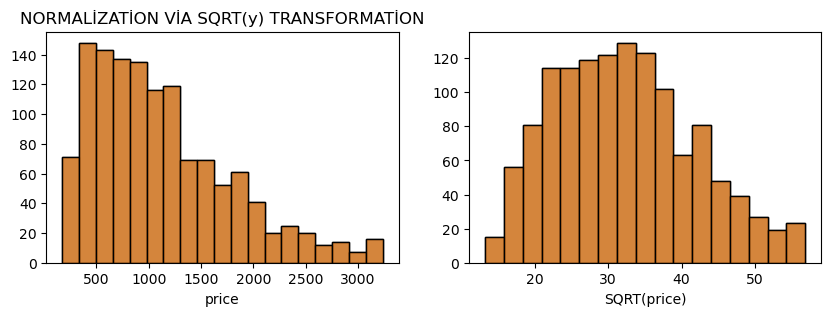

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.histplot(df_new.price, ax=ax1)
sns.histplot(np.sqrt(df_new.price),ax=ax2)

plt.subplot(1, 2, 1)
sns.histplot(df_new.price, ax=ax1)
plt.title('NORMALİZATİON VİA SQRT(y) TRANSFORMATİON')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.histplot(np.sqrt(df_new.price),ax=ax2)
plt.xlabel('SQRT(price)')
plt.ylabel('')

plt.show()


In [29]:
## SQRT(y)- TRAİN-TEST SPLİT !!
from sklearn.model_selection import train_test_split
X=df_new.drop('price', axis = 1).copy()

y=np.sqrt(df_new['price']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
y_test

1179    25.495098
342     26.758176
649     39.799497
772     31.937439
803     41.821047
          ...    
701     19.974984
1105    37.591222
424     52.905576
944     36.041643
65      44.530888
Name: price, Length: 255, dtype: float64

In [31]:
X_train.head(3)

,Inches,isIps,company,compt_type,productt,isTouchScreen,int_ScreenResolution,cpu_name,cpu_speed,ram,memory_size,memory_type,extra_memory,gpu_brand,gpu_name,isRetina,isQuadscr,operate_sys,weight
413,-1.205746,1,0.0,0.0,54,1,3.0,34,0.391185,-0.086499,-0.515929,1.0,-0.423449,2.0,17,0,0,5.0,-0.658549
778,-0.715862,0,14.0,1.0,56,0,3.0,34,0.986839,1.483418,0.184684,1.0,-0.423449,3.0,3,0,0,5.0,-0.135328
1107,0.403873,1,10.0,0.0,221,1,3.0,33,-0.005918,-0.871458,-0.515929,1.0,-0.423449,2.0,17,0,0,5.0,0.088909


# **MODELS**

In [36]:
# FOR COMMON  USE !!

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb  


# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Xgboost': XGBRegressor()
  }

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #mse = mean_squared_error(np.exp(y_test),np.exp(y_pred))
    #R2=r2_score(np.exp(y_test),np.exp(y_pred))
    #print(f"{name}: Mean Squared Error = {mse:.2f}")
    
    mse = mean_squared_error(y_test**2, y_pred**2)
    R2=r2_score(y_test**2, y_pred**2)
    print('MAE',mean_absolute_error(y_test**2, y_pred**2))
    print(f"{name}: Mean Squared Error = {np.sqrt(mse):.2f}")
    print(f"{name}: R2 = {R2:.2f}")
    print('*'*44)
    


MAE 252.8072703709877
Linear Regression: Mean Squared Error = 336.10
Linear Regression: R2 = 0.73
********************************************
MAE 220.49626832303767
Decision Tree: Mean Squared Error = 314.85
Decision Tree: R2 = 0.76
********************************************
MAE 161.32775163738097
Random Forest: Mean Squared Error = 234.12
Random Forest: R2 = 0.87
********************************************
MAE 151.5118248039851
Gradient Boosting: Mean Squared Error = 216.90
Gradient Boosting: R2 = 0.89
********************************************
MAE 467.57615807780047
Support Vector Machine: Mean Squared Error = 650.16
Support Vector Machine: R2 = -0.03
********************************************
MAE 234.04929964946487
K-Nearest Neighbors: Mean Squared Error = 326.69
K-Nearest Neighbors: R2 = 0.74
********************************************
MAE 252.8587754928368
Ridge Regression: Mean Squared Error = 335.87
Ridge Regression: R2 = 0.73
*******************************************

### **XGBOOST İS CHOSEN  (91%)**

## **HYPER PARAMETER OPTIMIZATION**

### **XGBOOST HAS % 91  TOP R2  SCORE  AMONGS OTHER ML ALGORITHMS SO**
### **WE WILL  TRY  HYPER PARAMETER OPT. TO XGBOOST !!!!**

In [37]:
# Define the model

from sklearn.metrics import mean_squared_error
import optuna
import xgboost
model = xgboost.XGBRegressor()

# Fit the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)


In [39]:
# Create the study
study = optuna.create_study(direction='minimize', study_name='regression5')
study.optimize(objective, n_trials=60)


[I 2023-08-31 12:24:03,958] A new study created in memory with name: regression5
[I 2023-08-31 12:24:04,390] Trial 0 finished with value: 8.362422529602874 and parameters: {'max_depth': 7, 'learning_rate': 0.4511405102802327, 'n_estimators': 687, 'min_child_weight': 10, 'gamma': 0.40979275887471, 'subsample': 0.8335041679238592, 'colsample_bytree': 0.024249884470185376, 'reg_alpha': 0.33251986505395215, 'reg_lambda': 0.8049829584686702, 'random_state': 841}. Best is trial 0 with value: 8.362422529602874.
[I 2023-08-31 12:24:04,769] Trial 1 finished with value: 7.688043773329212 and parameters: {'max_depth': 2, 'learning_rate': 0.05887773139070179, 'n_estimators': 743, 'min_child_weight': 6, 'gamma': 0.12068510687250021, 'subsample': 0.2950574736424231, 'colsample_bytree': 0.6736460376937519, 'reg_alpha': 0.9911412897042239, 'reg_lambda': 0.9488994520528661, 'random_state': 911}. Best is trial 1 with value: 7.688043773329212.
[I 2023-08-31 12:24:05,465] Trial 2 finished with value: 16.3

In [40]:
# Print the best parameters
print('Best parameters', study.best_params)
# Print the best value
print('Best value', study.best_value)
# Print the best trial
print('Best trial', study.best_trial)

model = xgboost.XGBRegressor(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test**2, y_pred**2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test**2, y_pred**2)))
print('R2: ', r2_score(y_test**2, y_pred**2))
print('MAE: ', mean_absolute_error(y_test**2, y_pred**2))


Best parameters {'max_depth': 8, 'learning_rate': 0.05347824149066003, 'n_estimators': 635, 'min_child_weight': 2, 'gamma': 0.4541618492822189, 'subsample': 0.7519363381317292, 'colsample_bytree': 0.4227213265684545, 'reg_alpha': 0.044903784407536604, 'reg_lambda': 0.18379441711235217, 'random_state': 838}
Best value 5.362528873373008
Best trial FrozenTrial(number=58, state=TrialState.COMPLETE, values=[5.362528873373008], datetime_start=datetime.datetime(2023, 8, 31, 12, 25, 10, 544310), datetime_complete=datetime.datetime(2023, 8, 31, 12, 25, 11, 759961), params={'max_depth': 8, 'learning_rate': 0.05347824149066003, 'n_estimators': 635, 'min_child_weight': 2, 'gamma': 0.4541618492822189, 'subsample': 0.7519363381317292, 'colsample_bytree': 0.4227213265684545, 'reg_alpha': 0.044903784407536604, 'reg_lambda': 0.18379441711235217, 'random_state': 838}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), '

In [41]:
import pickle as pkl
filename = "xgbregressor2.pkl"
pkl.dump(model, open(filename, "wb"))


In [42]:
df_diff=pd.DataFrame(list(zip(y_test**2,np.round(y_pred**2))), columns=['Real','Pred'])
df_diff['Gap']=df_diff.Real-df_diff.Pred
df_diff.Gap=np.absolute(df_diff.Gap)
df_diff.sort_values('Gap',ascending=False).head(60)

,Real,Pred,Gap
189,1269.00,1997.0,728.00
178,1962.99,1310.0,652.99
55,1199.00,1826.0,627.00
96,699.00,1258.0,559.00
76,1545.64,2079.0,533.36
215,2999.00,2521.0,478.00
117,1349.00,1814.0,465.00
220,1799.00,1334.0,465.00
240,2399.00,1945.0,454.00
232,1873.00,1427.0,446.00


In [52]:
train_preds=model.predict(X_train)
print('MSE: ', mean_squared_error(y_train**2, train_preds**2))
print('RMSE: ', np.sqrt(mean_squared_error(y_train**2, train_preds**2)))
print('R2: ', r2_score(y_train**2, train_preds**2))
print('MAE: ', mean_absolute_error(y_train**2, train_preds**2))

MSE:  2724.7569494504583
RMSE:  52.19920449059026
R2:  0.9938784839477235
MAE:  35.3103427285587


# **Feature Importances**

In [102]:
model.feature_names_in_

array(['Inches', 'isIps', 'company', 'compt_type', 'productt',
       'isTouchScreen', 'int_ScreenResolution', 'cpu_name', 'cpu_speed',
       'ram', 'memory_size', 'memory_type', 'extra_memory', 'gpu_brand',
       'gpu_name', 'isRetina', 'isQuadscr', 'operate_sys', 'weight'],
      dtype='<U20')

Text(0.5, 0, 'Xgboost Feature Importance')

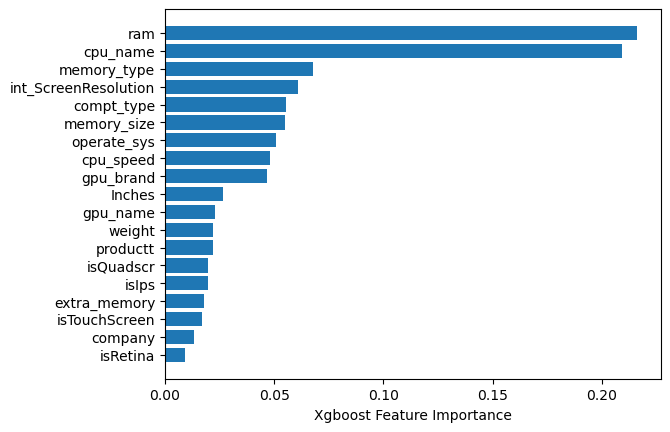

In [74]:

sorted_idx = model.feature_importances_.argsort()
plt.barh(model.feature_names_in_[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

# **THE  END**

In [78]:
# Create the study
study = optuna.create_study(direction='minimize', study_name='regression7')
study.optimize(objective, n_trials=100)

# Print the best parameters
print('Best parameters', study.best_params)
# Print the best value
print('Best value', study.best_value)
# Print the best trial
print('Best trial', study.best_trial)

model = xgboost.XGBRegressor(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test**2, y_pred**2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test**2, y_pred**2)))
print('R2: ', r2_score(y_test**2, y_pred**2))
print('MAE: ', mean_absolute_error(y_test**2, y_pred**2))

[I 2023-08-31 11:15:50,246] A new study created in memory with name: regression7
[I 2023-08-31 11:15:50,883] Trial 0 finished with value: 59226.58154671954 and parameters: {'max_depth': 2, 'learning_rate': 0.5036155939270719, 'n_estimators': 881, 'min_child_weight': 9, 'gamma': 0.6343424742263217, 'subsample': 0.31669765368009056, 'colsample_bytree': 0.6859675814772607, 'reg_alpha': 0.010787380705721647, 'reg_lambda': 0.7495989331119319, 'random_state': 909}. Best is trial 0 with value: 59226.58154671954.
[I 2023-08-31 11:15:52,201] Trial 1 finished with value: 68684.22726241675 and parameters: {'max_depth': 6, 'learning_rate': 0.6616958884617071, 'n_estimators': 956, 'min_child_weight': 2, 'gamma': 0.4780839338644365, 'subsample': 0.8166052852777895, 'colsample_bytree': 0.5185992521165592, 'reg_alpha': 0.9327132029056407, 'reg_lambda': 0.6327912418536108, 'random_state': 839}. Best is trial 0 with value: 59226.58154671954.
[I 2023-08-31 11:15:52,489] Trial 2 finished with value: 63674

Best parameters {'max_depth': 5, 'learning_rate': 0.04791338359366633, 'n_estimators': 630, 'min_child_weight': 6, 'gamma': 0.9132455973502138, 'subsample': 0.8981495327850403, 'colsample_bytree': 0.42279615314818303, 'reg_alpha': 0.7590354848665519, 'reg_lambda': 0.10530993436357212, 'random_state': 327}
Best value 29273.677937202734
Best trial FrozenTrial(number=72, state=TrialState.COMPLETE, values=[29273.677937202734], datetime_start=datetime.datetime(2023, 8, 31, 11, 16, 41, 535238), datetime_complete=datetime.datetime(2023, 8, 31, 11, 16, 42, 299078), params={'max_depth': 5, 'learning_rate': 0.04791338359366633, 'n_estimators': 630, 'min_child_weight': 6, 'gamma': 0.9132455973502138, 'subsample': 0.8981495327850403, 'colsample_bytree': 0.42279615314818303, 'reg_alpha': 0.7590354848665519, 'reg_lambda': 0.10530993436357212, 'random_state': 327}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), '

# USEFUL   EXAMPLES!!

In [ ]:
df.groupby('Airline')[['DepDelay']].agg(['mean','min','max'])

In [ ]:
df.groupby('Airline')[['DepDelay','ArrDelay']].agg(['mean','min','max'])

In [ ]:
df_agg=df.groupby('Airline')[['DepDelay','ArrDelay']].agg(['mean','min','max'])

In [ ]:
df_agg.columns=['_'.join(c) for c in df_agg.columns]
df_agg

In [ ]:
df[['FlightDate','Airline','ArrDelay']].sort_values('ArrDelay', ascending=False)\
.reset_index(drop=True)

In [ ]:
df.dropna(subset=['ArrDelay'])